# Stock Market Data Analysis, Visualization and Best Predictive Models Development

## MJS Stock Market Data Analysis

## Project Goal
Develop a comprehensive analysis of at least four stocks, including:
* ● Data collection and cleaning
* ● Exploratory Data Analysis (EDA)
* ● Predictive modeling for price forecasting
* ● Interactive dashboard development

 ### Selected stocks
 1. Airbnb (ABNB)
 2. Booking Holdings (BKNG)
 3. Expedia (EXPE), and
 4. Marriott International (MAR)

In [ ]:
!pip install yfinance

In [ ]:
!pip install statsmodels

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.1 MB/s eta 0:00:00


In [ ]:
!pip install prophet

In [ ]:
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 42.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setu

In [ ]:
# libraies imported
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

## Data Collection:

In [ ]:
## fetching data Airbnb (ABNB)

# Long Range: data for a max period with time-interval of 1 Day.


# Define stock symbol and the timeframe
symbol = 'ABNB'
data_abnb_lr = yf.download(symbol, period="max", interval="1d")

print(data_abnb_lr.head())

# Checkink the size
data_abnb_lr.shape


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            ABNB        ABNB        ABNB        ABNB      ABNB
Date                                                                
2020-12-10  144.710007  165.000000  141.250000  146.000000  70447500
2020-12-11  139.250000  151.500000  135.100006  146.550003  26980800
2020-12-14  130.000000  135.300003  125.160004  135.000000  16966100
2020-12-15  124.800003  127.599998  121.500000  126.690002  10914400
2020-12-16  137.990005  142.000000  124.910004  125.830002  20409600


(1043, 5)

<Axes: xlabel='Date'>

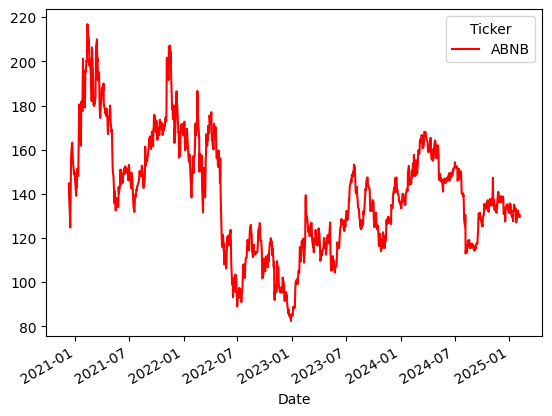

In [ ]:
data_abnb_lr.plot.line(y="Close", use_index=True, color='red')


In [ ]:
# converting into dataframe
ABNB_df_lr =pd.DataFrame(data_abnb_lr)

# creating a new column Stock
ABNB_df_lr['Stock'] = 'ABNB'

# Reset the index to move the date column into the dataFrame
ABNB_df_lr.reset_index(inplace=True)
print(ABNB_df_lr.head())

Price        Date       Close        High         Low        Open    Volume  \
Ticker                   ABNB        ABNB        ABNB        ABNB      ABNB   
0      2020-12-10  144.710007  165.000000  141.250000  146.000000  70447500   
1      2020-12-11  139.250000  151.500000  135.100006  146.550003  26980800   
2      2020-12-14  130.000000  135.300003  125.160004  135.000000  16966100   
3      2020-12-15  124.800003  127.599998  121.500000  126.690002  10914400   
4      2020-12-16  137.990005  142.000000  124.910004  125.830002  20409600   

Price  Stock  
Ticker        
0       ABNB  
1       ABNB  
2       ABNB  
3       ABNB  
4       ABNB  


In [ ]:
# Renaming all columns
ABNB_df_lr.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Stock']
print(ABNB_df_lr.head())

        Date       Close        High         Low        Open    Volume Stock
0 2020-12-10  144.710007  165.000000  141.250000  146.000000  70447500  ABNB
1 2020-12-11  139.250000  151.500000  135.100006  146.550003  26980800  ABNB
2 2020-12-14  130.000000  135.300003  125.160004  135.000000  16966100  ABNB
3 2020-12-15  124.800003  127.599998  121.500000  126.690002  10914400  ABNB
4 2020-12-16  137.990005  142.000000  124.910004  125.830002  20409600  ABNB


In [ ]:
data_abnb_lr['Datetime'] = data_abnb_lr.index.strftime('%Y-%m-%d %H:%M')
##data_abnb_sr_df=pd.read_csv(data_abnb_sr.to_csv(f"{symbol}_short_range.csv"))
print(data_abnb_lr.head())
data_abnb_lr.columns
data_abnb_lr.info()

Price            Close        High         Low        Open    Volume  \
Ticker            ABNB        ABNB        ABNB        ABNB      ABNB   
Date                                                                   
2020-12-10  144.710007  165.000000  141.250000  146.000000  70447500   
2020-12-11  139.250000  151.500000  135.100006  146.550003  26980800   
2020-12-14  130.000000  135.300003  125.160004  135.000000  16966100   
2020-12-15  124.800003  127.599998  121.500000  126.690002  10914400   
2020-12-16  137.990005  142.000000  124.910004  125.830002  20409600   

Price               Datetime  
Ticker                        
Date                          
2020-12-10  2020-12-10 00:00  
2020-12-11  2020-12-11 00:00  
2020-12-14  2020-12-14 00:00  
2020-12-15  2020-12-15 00:00  
2020-12-16  2020-12-16 00:00  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1043 entries, 2020-12-10 to 2025-02-05
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  -

In [ ]:
print(data_abnb_lr.index)

DatetimeIndex(['2020-12-10', '2020-12-11', '2020-12-14', '2020-12-15',
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-21',
               '2020-12-22', '2020-12-23',
               ...
               '2025-01-23', '2025-01-24', '2025-01-27', '2025-01-28',
               '2025-01-29', '2025-01-30', '2025-01-31', '2025-02-03',
               '2025-02-04', '2025-02-05'],
              dtype='datetime64[ns]', name='Date', length=1043, freq=None)


In [ ]:
## fetching data Booking Holdings (BKNG)
symbol = 'BKNG'


# Long Range: data for a max period with time-interval of 1 Day.
data_bkng_lr = yf.download(symbol, period="max", interval="1d")

print(data_bkng_lr.head())

# Checkink the size
data_bkng_lr.shape

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open   Volume
Ticker            BKNG        BKNG        BKNG        BKNG     BKNG
Date                                                               
1999-03-31  492.879883  512.951914  434.150606  447.531960  1322933
1999-04-01  478.755157  547.148751  471.321071  545.661934   483233
1999-04-05  446.788574  499.570585  431.176993  496.596951   324917
1999-04-06  469.834229  479.870244  416.308810  448.275379   353900
1999-04-07  443.071503  483.215565  438.611051  476.524888   156617


(6504, 5)

<Axes: xlabel='Date'>

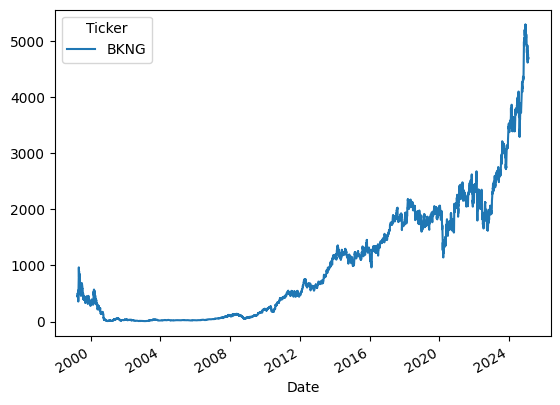

In [ ]:
data_bkng_lr.plot.line(y="Close", use_index=True)

In [ ]:
# converting into dataframe
BKNG_df_lr =pd.DataFrame(data_bkng_lr)

# creating a new column Stock
BKNG_df_lr['Stock'] = 'BKNG'

# Reset the index to move the date column into the dataFrame
BKNG_df_lr.reset_index(inplace=True)

# Renaming all columns
BKNG_df_lr.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Stock']


print(BKNG_df_lr.head())

        Date       Close        High         Low        Open   Volume Stock
0 1999-03-31  492.879883  512.951914  434.150606  447.531960  1322933  BKNG
1 1999-04-01  478.755157  547.148751  471.321071  545.661934   483233  BKNG
2 1999-04-05  446.788574  499.570585  431.176993  496.596951   324917  BKNG
3 1999-04-06  469.834229  479.870244  416.308810  448.275379   353900  BKNG
4 1999-04-07  443.071503  483.215565  438.611051  476.524888   156617  BKNG


In [ ]:
## fetching data Expedia (EXPE)
symbol = 'EXPE'

# Long Range: data for a max period with time-interval of 1 Day.
data_expe_lr = yf.download(symbol, period="max", interval="1d")
print(data_expe_lr.head())

# Checkink the size
data_expe_lr.shape

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open  Volume
Ticker           EXPE       EXPE       EXPE       EXPE    EXPE
Date                                                          
2005-07-21  31.640829  32.404846  31.509102  31.759384  109200
2005-07-22  32.747337  32.800027  31.548622  32.431193   56800
2005-07-25  31.930630  32.800028  31.812075  32.800028   39600
2005-07-26  31.614489  32.075534  31.285171  32.075534  102450
2005-07-27  31.706696  31.772561  31.153442  31.614487   98100


(4918, 5)

<Axes: xlabel='Date'>

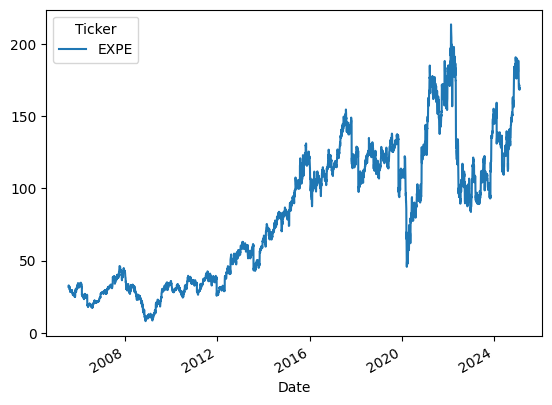

In [ ]:
data_expe_lr.plot.line(y="Close", use_index=True)

In [ ]:
# converting into dataframe
EXPE_df_lr =pd.DataFrame(data_expe_lr)

# creating a new column Stock
EXPE_df_lr['Stock'] = 'EXPE'

# Reset the index to move the date column into the dataFrame
EXPE_df_lr.reset_index(inplace=True)

# Renaming all columns
EXPE_df_lr.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Stock']


print(EXPE_df_lr.head())

        Date      Close       High        Low       Open  Volume Stock
0 2005-07-21  31.640829  32.404846  31.509102  31.759384  109200  EXPE
1 2005-07-22  32.747337  32.800027  31.548622  32.431193   56800  EXPE
2 2005-07-25  31.930630  32.800028  31.812075  32.800028   39600  EXPE
3 2005-07-26  31.614489  32.075534  31.285171  32.075534  102450  EXPE
4 2005-07-27  31.706696  31.772561  31.153442  31.614487   98100  EXPE


In [ ]:
## fetching data Marriott International (MAR)
symbol = 'MAR'
# Long Range: data for a max period with time-interval of 1 Day.
data_mar_lr = yf.download(symbol, period="max", interval="1d")
print(data_mar_lr.head())


# Checking the size
data_mar_lr.shape

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open  Volume
Ticker            MAR        MAR        MAR        MAR     MAR
Date                                                          
1998-03-23  13.152130  13.152130  13.152130  13.152130    1073
1998-03-24  13.654468  13.654468  13.334798  13.334798  116711
1998-03-25  13.859971  13.859971  13.700136  13.837138   27891
1998-03-26  13.791472  13.791472  13.631637  13.768638   76163
1998-03-27  13.471803  13.745805  13.289133  13.745805  847444


(6762, 5)

In [ ]:
# converting into dataframe
MAR_df_lr =pd.DataFrame(data_mar_lr)

# creating a new column Stock
MAR_df_lr['Stock'] = 'MAR'

# Reset the index to move the date column into the dataFrame
MAR_df_lr.reset_index(inplace=True)

# Renaming all columns
MAR_df_lr.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Stock']


print(MAR_df_lr.head())

        Date      Close       High        Low       Open  Volume Stock
0 1998-03-23  13.152130  13.152130  13.152130  13.152130    1073   MAR
1 1998-03-24  13.654468  13.654468  13.334798  13.334798  116711   MAR
2 1998-03-25  13.859971  13.859971  13.700136  13.837138   27891   MAR
3 1998-03-26  13.791472  13.791472  13.631637  13.768638   76163   MAR
4 1998-03-27  13.471803  13.745805  13.289133  13.745805  847444   MAR


In [ ]:
# compbining the four dataframes
combine_stock_df = pd.concat([ABNB_df_lr,BKNG_df_lr,EXPE_df_lr,MAR_df_lr], axis=0)

print(combine_stock_df)

           Date       Close        High         Low        Open    Volume  \
0    2020-12-10  144.710007  165.000000  141.250000  146.000000  70447500   
1    2020-12-11  139.250000  151.500000  135.100006  146.550003  26980800   
2    2020-12-14  130.000000  135.300003  125.160004  135.000000  16966100   
3    2020-12-15  124.800003  127.599998  121.500000  126.690002  10914400   
4    2020-12-16  137.990005  142.000000  124.910004  125.830002  20409600   
...         ...         ...         ...         ...         ...       ...   
6757 2025-01-30  292.540009  294.989990  290.920013  290.920013   1030500   
6758 2025-01-31  290.589996  293.709991  289.290009  291.649994   1293100   
6759 2025-02-03  290.459991  290.970001  283.089996  286.790009   1218000   
6760 2025-02-04  290.750000  291.859985  289.100006  291.480011   1401800   
6761 2025-02-05  292.390015  293.140015  288.079987  291.059998   1329700   

     Stock  
0     ABNB  
1     ABNB  
2     ABNB  
3     ABNB  
4     ABNB

In [ ]:
# Description of Data in the Dataframe and rounding its values up to two decimal places

combine_stock_df.describe().round(2)


,Date,Close,High,Low,Open,Volume
count,19227,19227.00,19227.00,19227.00,19227.00,19227.00
mean,2013-05-19 20:39:07.948197888,389.26,394.09,384.40,389.29,2117962.82
min,1998-03-23 00:00:00,6.54,7.08,6.24,6.54,1073.00
25%,2007-05-17 12:00:00,28.55,28.97,28.10,28.53,741900.00
50%,2013-09-27 00:00:00,94.03,95.55,92.51,94.22,1600274.00
75%,2020-02-10 00:00:00,176.96,180.00,173.95,177.05,2691500.00
max,2025-02-05 00:00:00,5300.34,5337.24,5260.00,5300.00,74786400.00
std,NaN,761.00,769.04,752.71,760.78,2273852.47


In [ ]:
# converting the "Date" column dtype from object to date
combine_stock_df["Date"] = pd.to_datetime(combine_stock_df["Date"])

## Data Cleaning:
* ■ Handle missing values (e.g., forward fill, backward fill, interpolation).
* ■ Address outliers (e.g., Winsorization, removal).
* ■ Clean and preprocess data for further analysis

### Handle missing Values

In [ ]:
# Checking the missing Value

print(combine_stock_df.isna().sum())

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
Stock     0
dtype: int64


In [ ]:
combine_stock_df.isnull().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0
Stock,0


In [ ]:
## Viewing Datatypes of all columns
combine_stock_df.info()
combine_stock_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 19227 entries, 0 to 6761
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    19227 non-null  datetime64[ns]
 1   Close   19227 non-null  float64       
 2   High    19227 non-null  float64       
 3   Low     19227 non-null  float64       
 4   Open    19227 non-null  float64       
 5   Volume  19227 non-null  int64         
 6   Stock   19227 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.2+ MB


,Date,Close,High,Low,Open,Volume,Stock
0,2020-12-10,144.710007,165.000000,141.250000,146.000000,70447500,ABNB
1,2020-12-11,139.250000,151.500000,135.100006,146.550003,26980800,ABNB
2,2020-12-14,130.000000,135.300003,125.160004,135.000000,16966100,ABNB
3,2020-12-15,124.800003,127.599998,121.500000,126.690002,10914400,ABNB
4,2020-12-16,137.990005,142.000000,124.910004,125.830002,20409600,ABNB


In [ ]:
# Handle missing Values


## Address outliers

In [ ]:
ABNB_df_lr.head()

,Date,Close,High,Low,Open,Volume,Stock
0,2020-12-10,144.710007,165.000000,141.250000,146.000000,70447500,ABNB
1,2020-12-11,139.250000,151.500000,135.100006,146.550003,26980800,ABNB
2,2020-12-14,130.000000,135.300003,125.160004,135.000000,16966100,ABNB
3,2020-12-15,124.800003,127.599998,121.500000,126.690002,10914400,ABNB
4,2020-12-16,137.990005,142.000000,124.910004,125.830002,20409600,ABNB


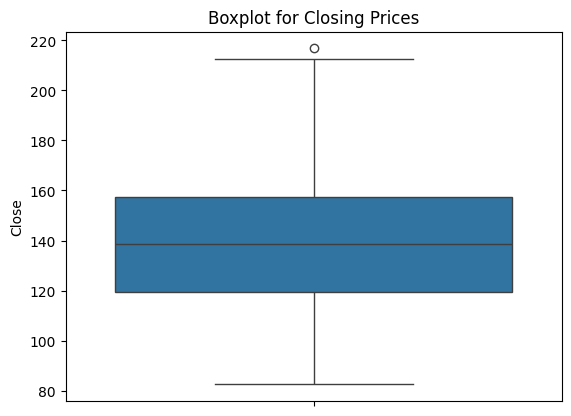

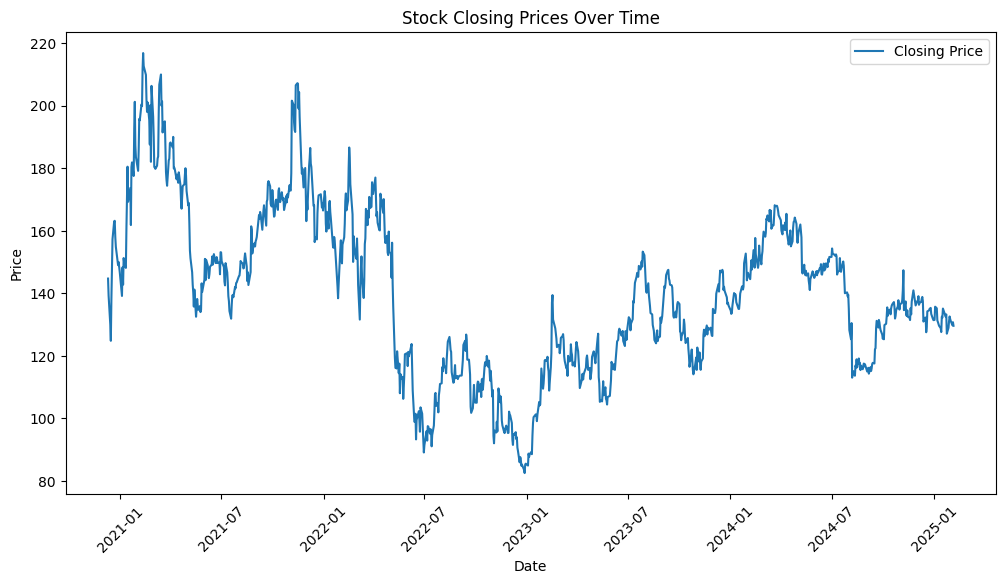

In [ ]:
# Address outliers ABNB
sns.boxplot(data=ABNB_df_lr["Close"])
plt.title("Boxplot for Closing Prices")

plt.show()
# Time-Series Plot to detect anomalies:
plt.figure(figsize=(12, 6))
plt.plot(ABNB_df_lr["Date"], ABNB_df_lr['Close'], label='Closing Price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Closing Prices Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Using the iterquantile range , Identofying the theresholds

# 75th percentile
seventy_fifth = ABNB_df_lr["Close"].quantile(0.75)

# 25th percentile
twenty_fifth = ABNB_df_lr["Close"].quantile(0.25)

# Interquartile range
close_iqr = seventy_fifth -twenty_fifth
print(close_iqr)


38.09000015258789


In [ ]:
## Identifyingoutliers

# Upper threshold
upper=seventy_fifth+ (1.5 * close_iqr)

# Lower threshold
lower=twenty_fifth-(1.5 * close_iqr)
print("Outliers based on IQR:")
print(upper,lower)

Outliers based on IQR:
214.5200023651123 62.16000175476074


#### Handling Outliers , replace with mean

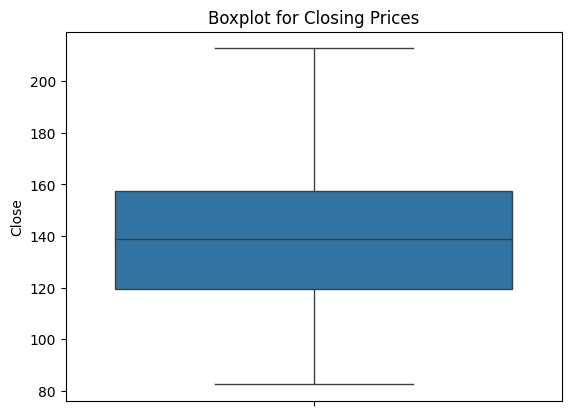

In [ ]:
mean_close = ABNB_df_lr[( ABNB_df_lr['Close'] >= lower) & ( ABNB_df_lr['Close'] <= upper)]['Close'].mean()
ABNB_df_lr.loc[(ABNB_df_lr['Close'] < lower) | ( ABNB_df_lr['Close'] > upper), 'Close'] = mean_close

# Checking outliers
# Address outliers ABNB

sns.boxplot(data = ABNB_df_lr["Close"])
plt.title("Boxplot for Closing Prices")
plt.show()

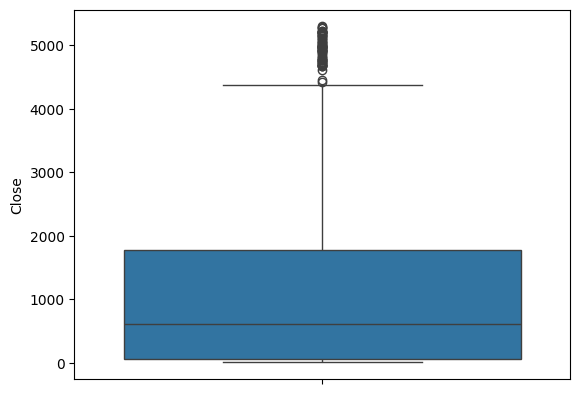

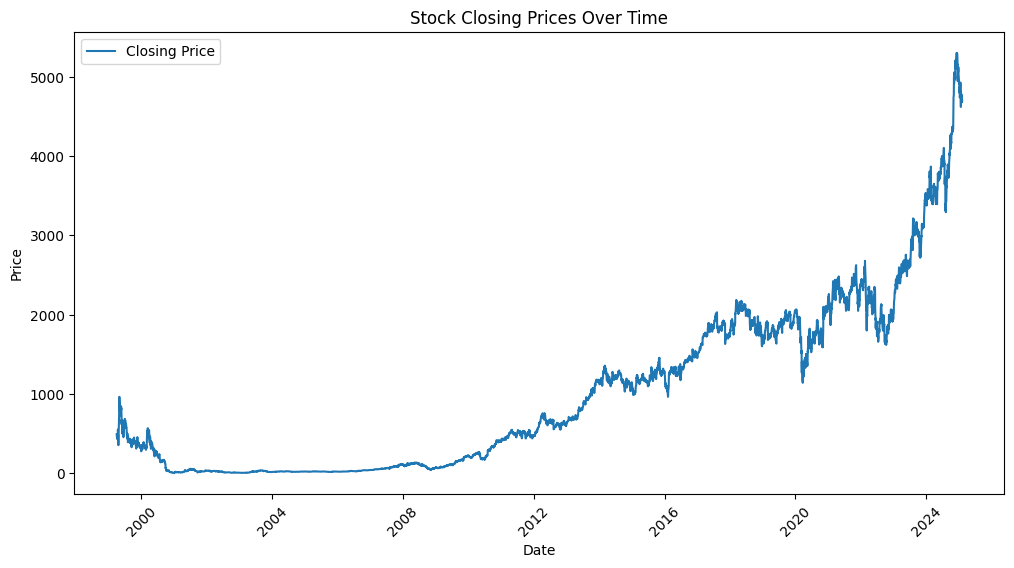

In [ ]:
# Adressing outlier BKNG
sns.boxplot(data=BKNG_df_lr["Close"])
plt.show()
# Time-Series Plot to detect anomalies:
plt.figure(figsize=(12, 6))
plt.plot(BKNG_df_lr["Date"], BKNG_df_lr['Close'], label='Closing Price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Closing Prices Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Using the iterquantile range , Identofying the theresholds

# 75th percentile
seventy_fifth = BKNG_df_lr["Close"].quantile(0.75)

# 25th percentile
twenty_fifth = BKNG_df_lr["Close"].quantile(0.25)

# Interquartile range
close_iqr = seventy_fifth -twenty_fifth
print(close_iqr)

1730.5634803771973


In [ ]:
## Identifyingoutliers

# Upper threshold
upper=seventy_fifth+ (1.5 * close_iqr)

# Lower threshold
lower=twenty_fifth-(1.5 * close_iqr)
print("Outliers based on IQR:")
print(upper,lower)

Outliers based on IQR:
4379.6615352630615 -2542.5923862457275


Handling Outliers , replace with mean

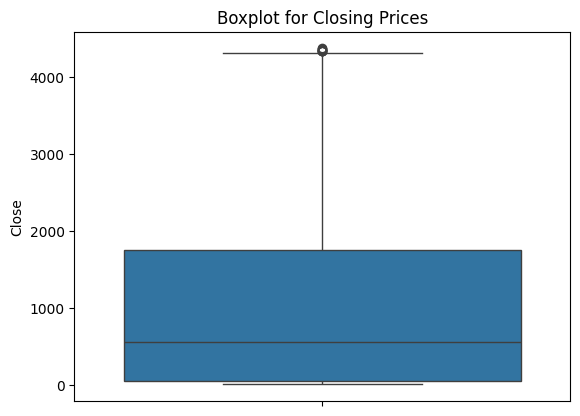

In [ ]:
mean_close = BKNG_df_lr[( BKNG_df_lr['Close'] >= lower) & ( ABNB_df_lr['Close'] <= upper)]['Close'].mean()
BKNG_df_lr.loc[(BKNG_df_lr['Close'] < lower) | ( BKNG_df_lr['Close'] > upper), 'Close'] = mean_close

# Checking outliers
# Address outliers BKNG

sns.boxplot(data = BKNG_df_lr["Close"])
plt.title("Boxplot for Closing Prices")
plt.show()

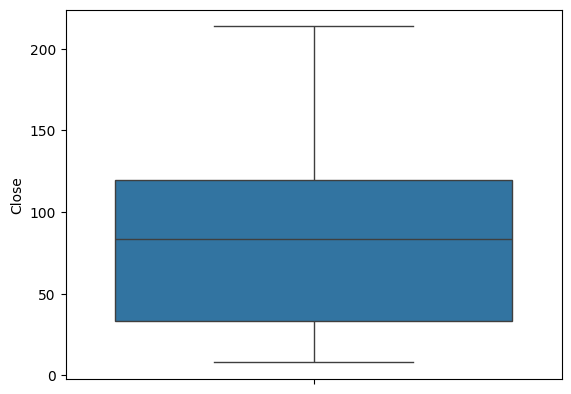

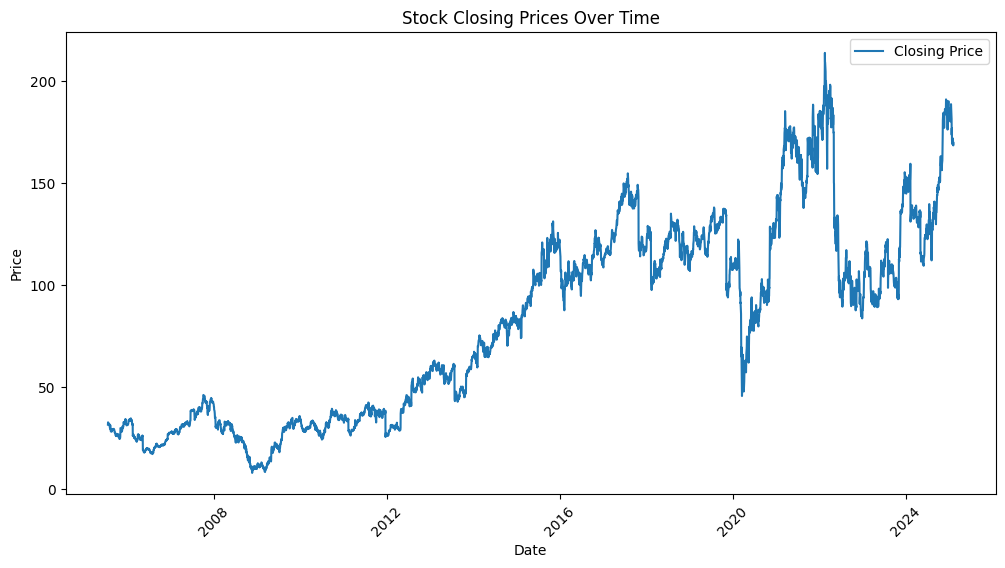

In [ ]:
# Adressing outlier EXPE
sns.boxplot(data=EXPE_df_lr["Close"])
# Time-Series Plot to detect anomalies:
plt.figure(figsize=(12, 6))
plt.plot(EXPE_df_lr["Date"], EXPE_df_lr['Close'], label='Closing Price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Closing Prices Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Using the iterquantile range , Identofying the theresholds

# 75th percentile
seventy_fifth = EXPE_df_lr["Close"].quantile(0.75)

# 25th percentile
twenty_fifth = EXPE_df_lr["Close"].quantile(0.25)

# Interquartile range
close_iqr = seventy_fifth -twenty_fifth
print(close_iqr)


86.14115142822266


In [ ]:
## Identifyingoutliers

# Upper threshold
upper=seventy_fifth+ (1.5 * close_iqr)

# Lower threshold
lower=twenty_fifth-(1.5 * close_iqr)
print("Outliers based on IQR:")
print(upper,lower)

Outliers based on IQR:
248.7599277496338 -95.80467796325684


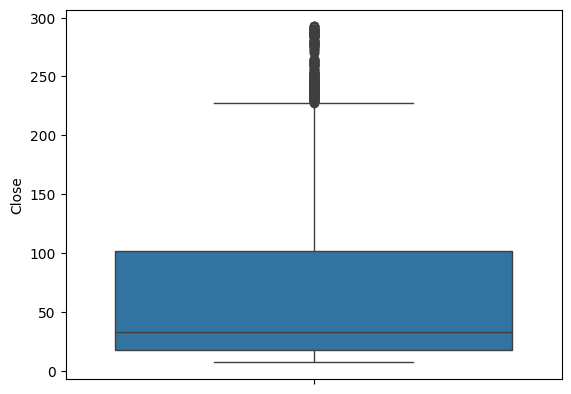

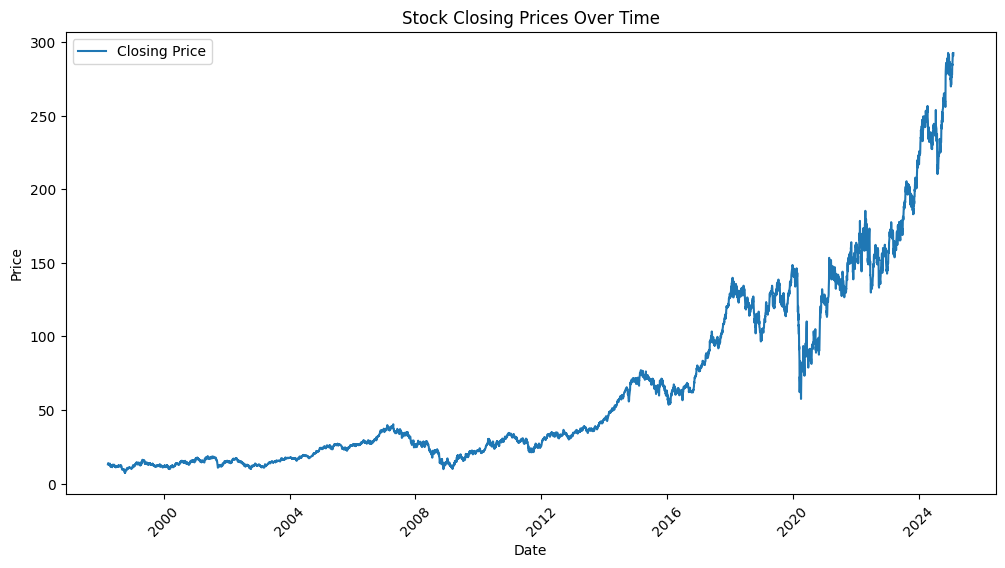

In [ ]:
# Adressing outlier MAR
sns.boxplot(data=MAR_df_lr["Close"])
# Time-Series Plot to detect anomalies:
plt.figure(figsize=(12, 6))
plt.plot(MAR_df_lr["Date"], MAR_df_lr['Close'], label='Closing Price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Closing Prices Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Using the iterquantile range , Identofying the theresholds

# 75th percentile
seventy_fifth = MAR_df_lr["Close"].quantile(0.75)

# 25th percentile
twenty_fifth = MAR_df_lr["Close"].quantile(0.25)

# Interquartile range
close_iqr = seventy_fifth -twenty_fifth
print(close_iqr)


83.83112478256226


In [ ]:
## Identifyingoutliers

# Upper threshold
upper=seventy_fifth+ (1.5 * close_iqr)

# Lower threshold
lower=twenty_fifth-(1.5 * close_iqr)
print("Outliers based on IQR:")
print(upper,lower)

Outliers based on IQR:
227.38867783546448 -107.93582129478455


Handling Outliers , replace with mean

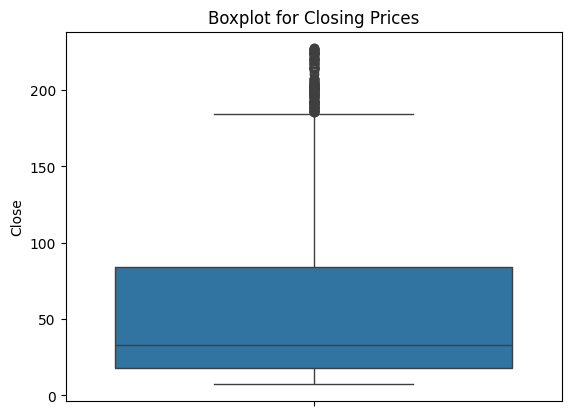

In [ ]:
mean_close = MAR_df_lr[( MAR_df_lr['Close'] >= lower) & ( MAR_df_lr['Close'] <= upper)]['Close'].mean()
MAR_df_lr.loc[(MAR_df_lr['Close'] < lower) | (MAR_df_lr['Close'] > upper), 'Close'] = mean_close
#median_close = MAR_df_lr[( MAR_df_lr['Close'] >= lower) & ( MAR_df_lr['Close'] <= upper)]['Close'].median()
#MAR_df_lr.loc[(MAR_df_lr['Close'] < lower) | (MAR_df_lr['Close'] > upper), 'Close'] = median_close
median_close = MAR_df_lr[(MAR_df_lr['Close'] >= lower) & (MAR_df_lr['Close'] <= upper)]['Close'].median()
MAR_df_lr.loc[(MAR_df_lr['Close'] < lower) | (MAR_df_lr['Close'] > upper), 'Close'] = median_close
# Checking outliers
# Address outliers MAR

sns.boxplot(data = MAR_df_lr["Close"])
plt.title("Boxplot for Closing Prices")
plt.show()

In [ ]:
# clean the data

# Exploratory Data Analysis (EDA):

## Univariate Analysis:

### Calculate summary statistics
(mean, median, standard deviation, etc.) for each stock in a given period for example for the last one year, for the last
one month, for the last one week, five days etc.

In [ ]:
## Calculate summary statistics
combine_stock_df.describe().round(2)

,Date,Close,High,Low,Open,Volume
count,19227,19227.00,19227.00,19227.00,19227.00,19227.00
mean,2013-05-19 20:39:07.948197888,389.26,394.09,384.40,389.29,2117962.82
min,1998-03-23 00:00:00,6.54,7.08,6.24,6.54,1073.00
25%,2007-05-17 12:00:00,28.55,28.97,28.10,28.53,741900.00
50%,2013-09-27 00:00:00,94.03,95.55,92.51,94.22,1600274.00
75%,2020-02-10 00:00:00,176.96,180.00,173.95,177.05,2691500.00
max,2025-02-05 00:00:00,5300.34,5337.24,5260.00,5300.00,74786400.00
std,NaN,761.00,769.04,752.71,760.78,2273852.47


In [ ]:
# Descriptive Statistics for each stock
descriptive_stat = combine_stock_df.groupby('Stock')['Close'].describe()
print(descriptive_stat)

        count        mean          std        min         25%         50%  \
Stock                                                                       
ABNB   1043.0  139.791405    25.794924  82.489998  119.295002  138.720001   
BKNG   6504.0  999.303248  1069.067378   6.541996   53.252834  610.923309   
EXPE   4918.0   81.653834    48.242757   7.969486   33.407049   83.354321   
MAR    6762.0   64.697272    62.874214   7.295544   17.810866   33.103117   

               75%          max  
Stock                            
ABNB    157.385002   216.839996  
BKNG   1783.816315  5300.339844  
EXPE    119.548201   213.800003  
MAR     101.641991   292.589996  


Let's see the result of each stock:
- ABNB
    - count = 1040, the number of observations(Trading days) included in the dataset for ABNB
    mean = 139.81 , the average closing price
    Std = 25.82, Measures the amont of variation or dispersion of closing prices
    min = 82.48, the lowest closing price in the data set
    25th Percentile : 119.21 , 25% of the closing prices are below this value
    Median (50%) : 138.78 , The middle value of the closing prices
    75th Percentile : 157.48 , 75% of the closing prices are below this value
    max = 216.83, the highest closing price in the dataset.
- BKNG
    - count = 6501, the number of observations(Trading days) included in the dataset for ABNB
    mean = 997.59 , the average closing price
    Std = 1066.36, Measures the amont of variation or dispersion of closing prices
    min = 6.54, the lowest closing price in the data set
    25th Percentile : 53.14 , 25% of the closing prices are below this value
    Median (50%) : 609.37 , The middle value of the closing prices
    75th Percentile : 1783.09 , 75% of the closing prices are below this value
    max = 5300.33, the highest closing price in the dataset.
 - EXPE
    - count = 4915, the number of observations(Trading days) included in the dataset for ABNB
    mean = 81.60 , the average closing price
    Std = 48.20, Measures the amont of variation or dispersion of closing prices
    min = 7.96, the lowest closing price in the data set
    25th Percentile : 33.39 , 25% of the closing prices are below this value
    Median (50%) : 83.25 , The middle value of the closing prices
    75th Percentile : 119.39 , 75% of the closing prices are below this value
    max = 213.80, the highest closing price in the dataset.  
  - MAR
    - count = 6759, the number of observations(Trading days) included in the dataset for ABNB
    mean = 64.59 , the average closing price
    Std = 62.70, Measures the amont of variation or dispersion of closing prices
    min = 7.29, the lowest closing price in the data set
    25th Percentile : 17.80 , 25% of the closing prices are below this value
    Median (50%) : 33.08 , The middle value of the closing prices
    75th Percentile : 101.46 , 75% of the closing prices are below this value
    max = 292.58, the highest closing price in the dataset.    

##Stock Price Summary & Comparison
Booking Holdings (BKNG) has the highest stock prices and the most volatility, meaning its prices fluctuate significantly over time.
Airbnb (ABNB) maintains relatively stable prices, sitting between the high-end BKNG and the lower-priced stocks like EXPE and MAR.
Expedia Group (EXPE) and Marriott International (MAR) have lower average prices, but EXPE shows more stability, whereas MAR has a wider price range.
Overall, BKNG is the most volatile and expensive stock, while EXPE and MAR are more affordable with varying levels of fluctuation. ABNB stands in between with moderate price movement.

###  ■ Visualize price trends using line charts and box plots.

<Axes: xlabel='Date', ylabel='Stock'>

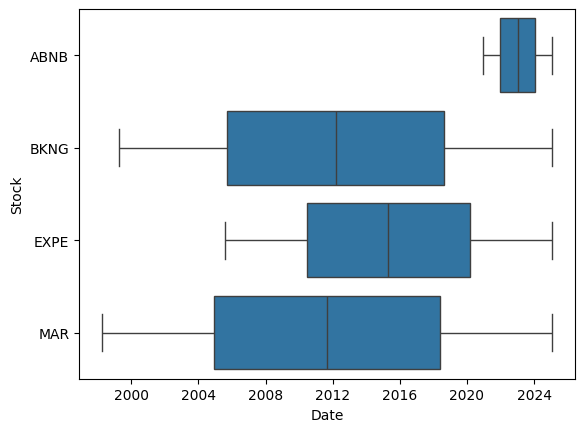

In [ ]:
sns.boxplot(data=combine_stock_df, x='Date', y="Stock")

### Comparing the Data


###  ○ Bivariate Analysis:
*  ■ Calculate and visualize correlations between the prices of different stock.
*  ■ Analyze the relationship between price and trading volume.

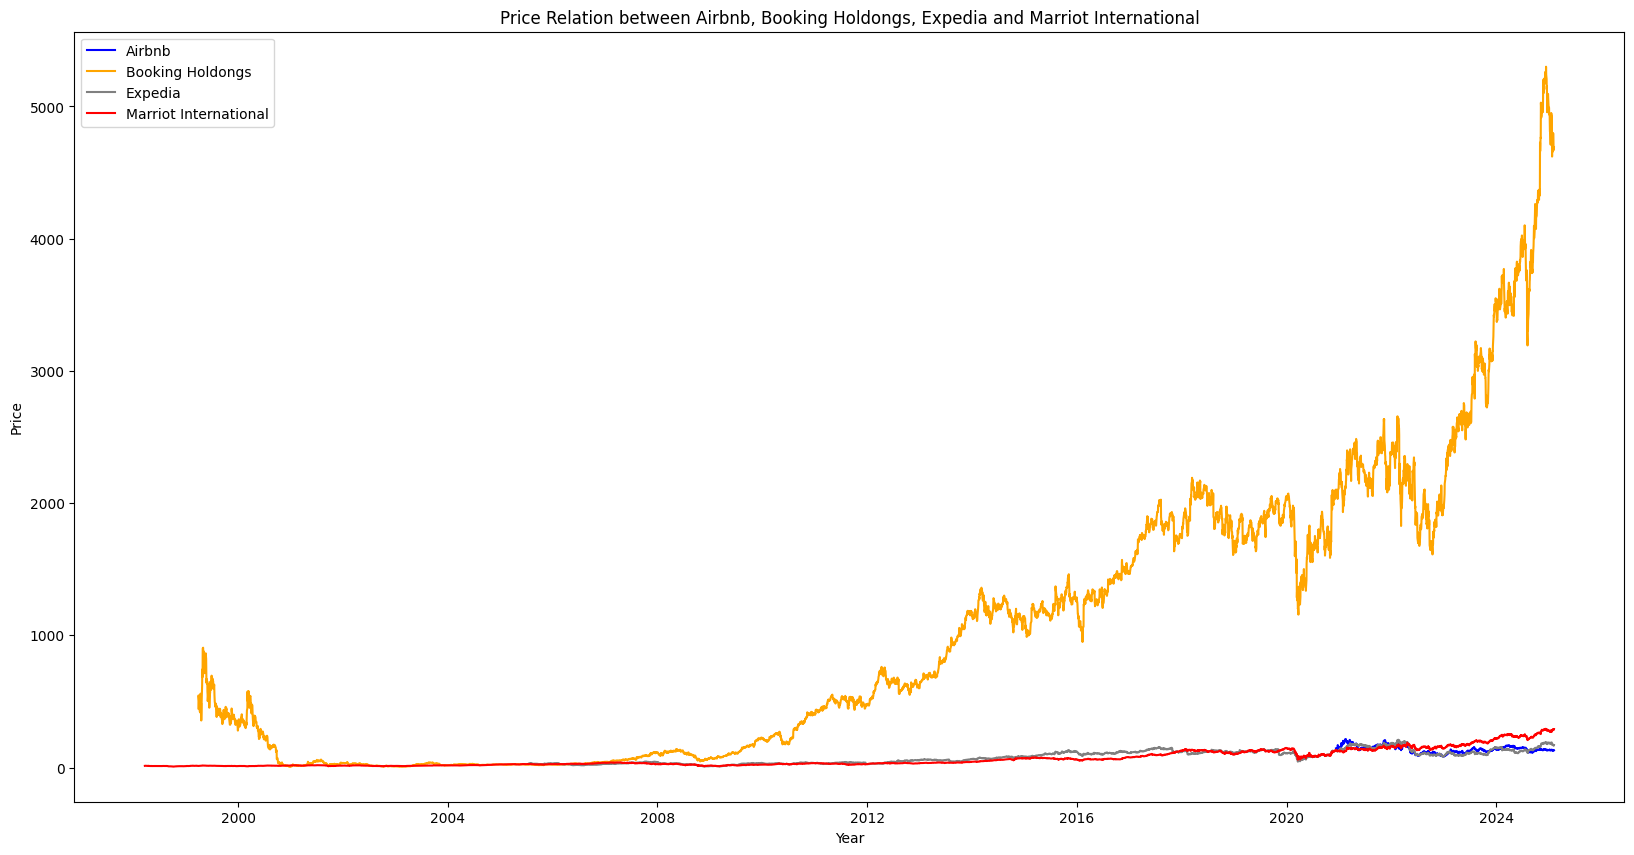

In [ ]:
# Price Comparision

plt.figure(figsize=(20,10))
plt.plot(ABNB_df_lr['Date'],ABNB_df_lr['Open'], color='blue', label='Airbnb')
plt.plot(BKNG_df_lr['Date'],BKNG_df_lr['Open'], color='orange', label='Booking Holdongs')
plt.plot(EXPE_df_lr['Date'],EXPE_df_lr['Open'], color='gray', label='Expedia')
plt.plot(MAR_df_lr['Date'],MAR_df_lr['Open'], color='red', label='Marriot International')

plt.title("Price Relation between Airbnb, Booking Holdongs, Expedia and Marriot International")
plt.xlabel("Year")
plt.ylabel('Price')
plt.legend(title="")

plt.show()


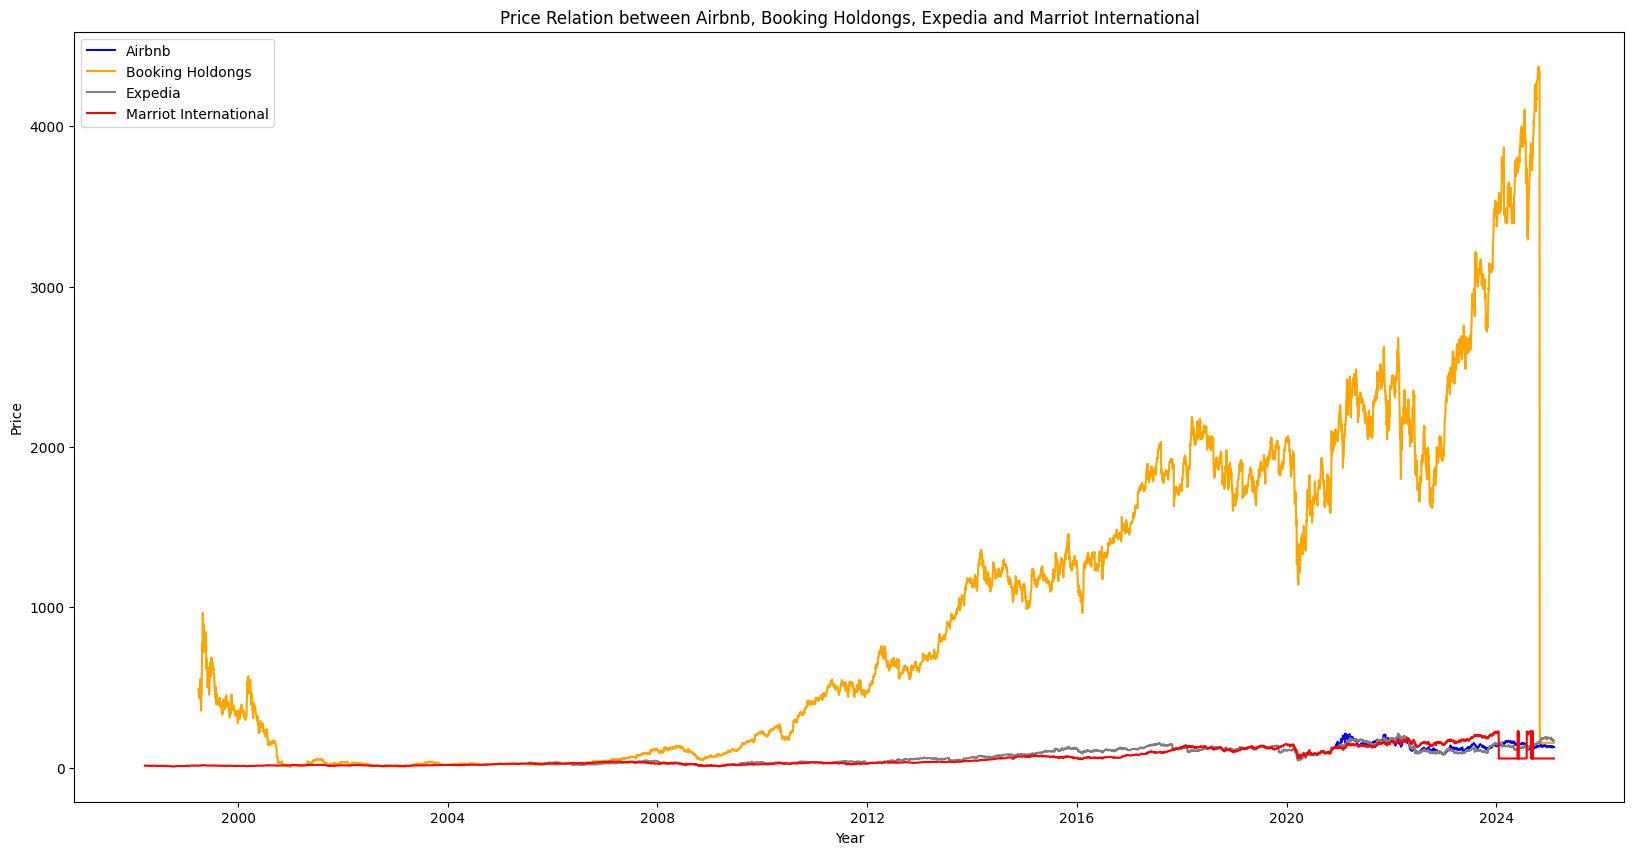

In [ ]:
# Price Comparision

plt.figure(figsize=(20,10))
plt.plot(ABNB_df_lr['Date'],ABNB_df_lr['Close'], color='blue', label='Airbnb')
plt.plot(BKNG_df_lr['Date'],BKNG_df_lr['Close'], color='orange', label='Booking Holdongs')
plt.plot(EXPE_df_lr['Date'],EXPE_df_lr['Close'], color='gray', label='Expedia')
plt.plot(MAR_df_lr['Date'],MAR_df_lr['Close'], color='red', label='Marriot International')

plt.title("Price Relation between Airbnb, Booking Holdongs, Expedia and Marriot International")
plt.xlabel("Year")
plt.ylabel('Price')
plt.legend(title="")

plt.show()

according to the graph above , Booking Holdings shows the highest and most volatile growth, while Airbnb, Expedia, and Marriott have relatively stable trends with lower prices.

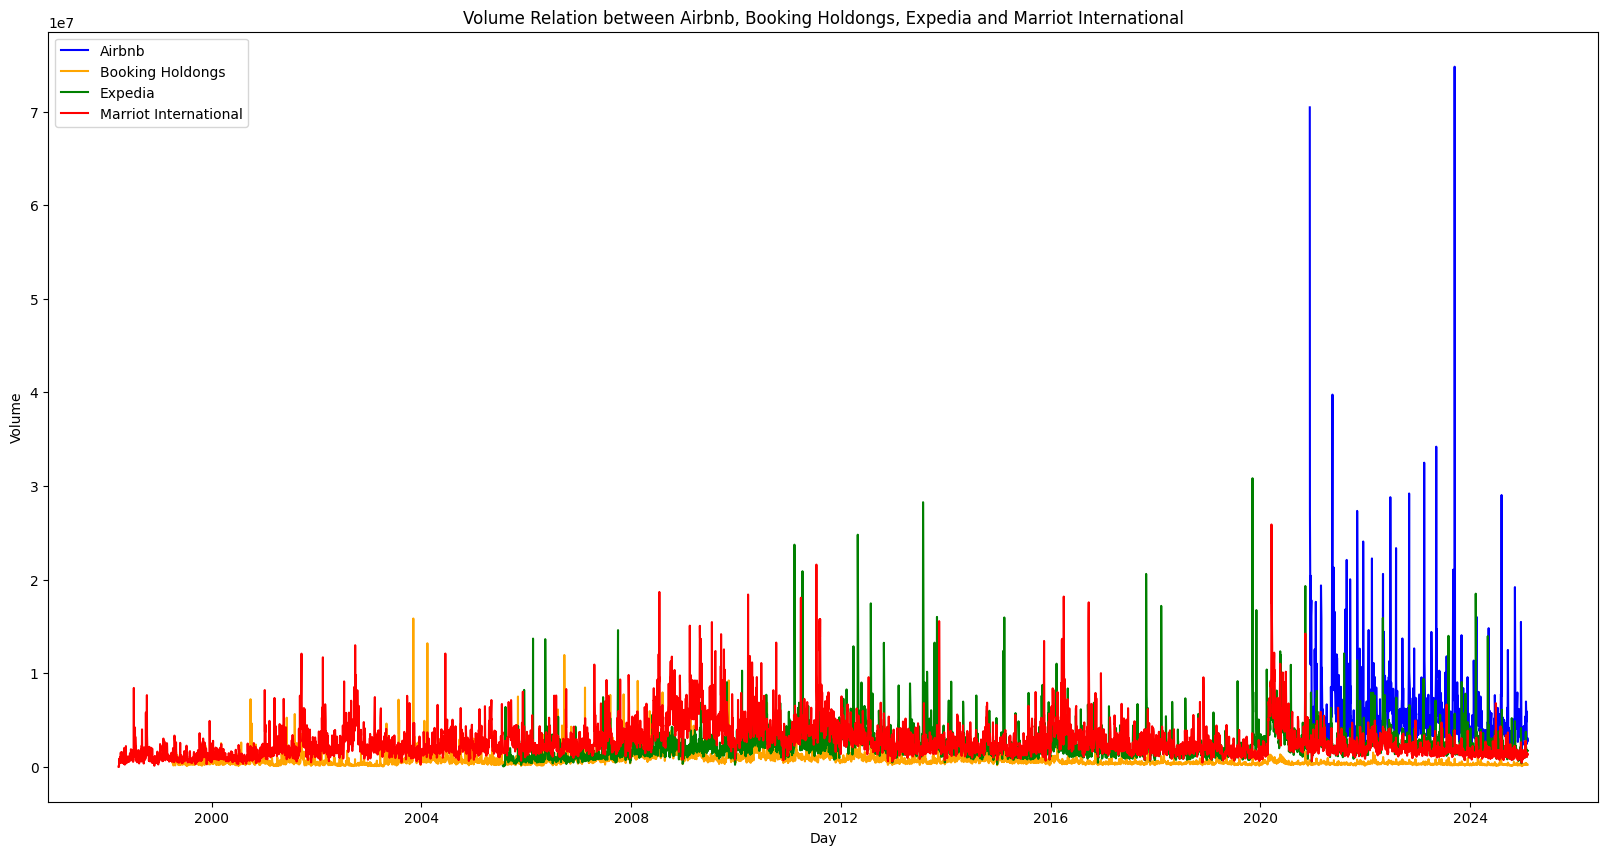

In [ ]:
# Volume Comparision
plt.figure(figsize=(20,10))
plt.plot(ABNB_df_lr['Date'],ABNB_df_lr['Volume'], color='blue', label='Airbnb')
plt.plot(BKNG_df_lr['Date'],BKNG_df_lr['Volume'], color='orange', label='Booking Holdongs')
plt.plot(EXPE_df_lr['Date'],EXPE_df_lr['Volume'], color='green', label='Expedia')
plt.plot(MAR_df_lr['Date'],MAR_df_lr['Volume'], color='red', label='Marriot International')

plt.title("Volume Relation between Airbnb, Booking Holdongs, Expedia and Marriot International")
plt.xlabel("Day")
plt.ylabel('Volume')
plt.legend(title="")

plt.show()

-> Trough the price of Booking Holdongs has risen more significantly as compare to others, we can notice from the above graph that Booking Holdongs has the least signifying has been traded less as compared to the other three. after year 2000 Airbnb on other hand has traded the most signifying higher liquidity and better execution.

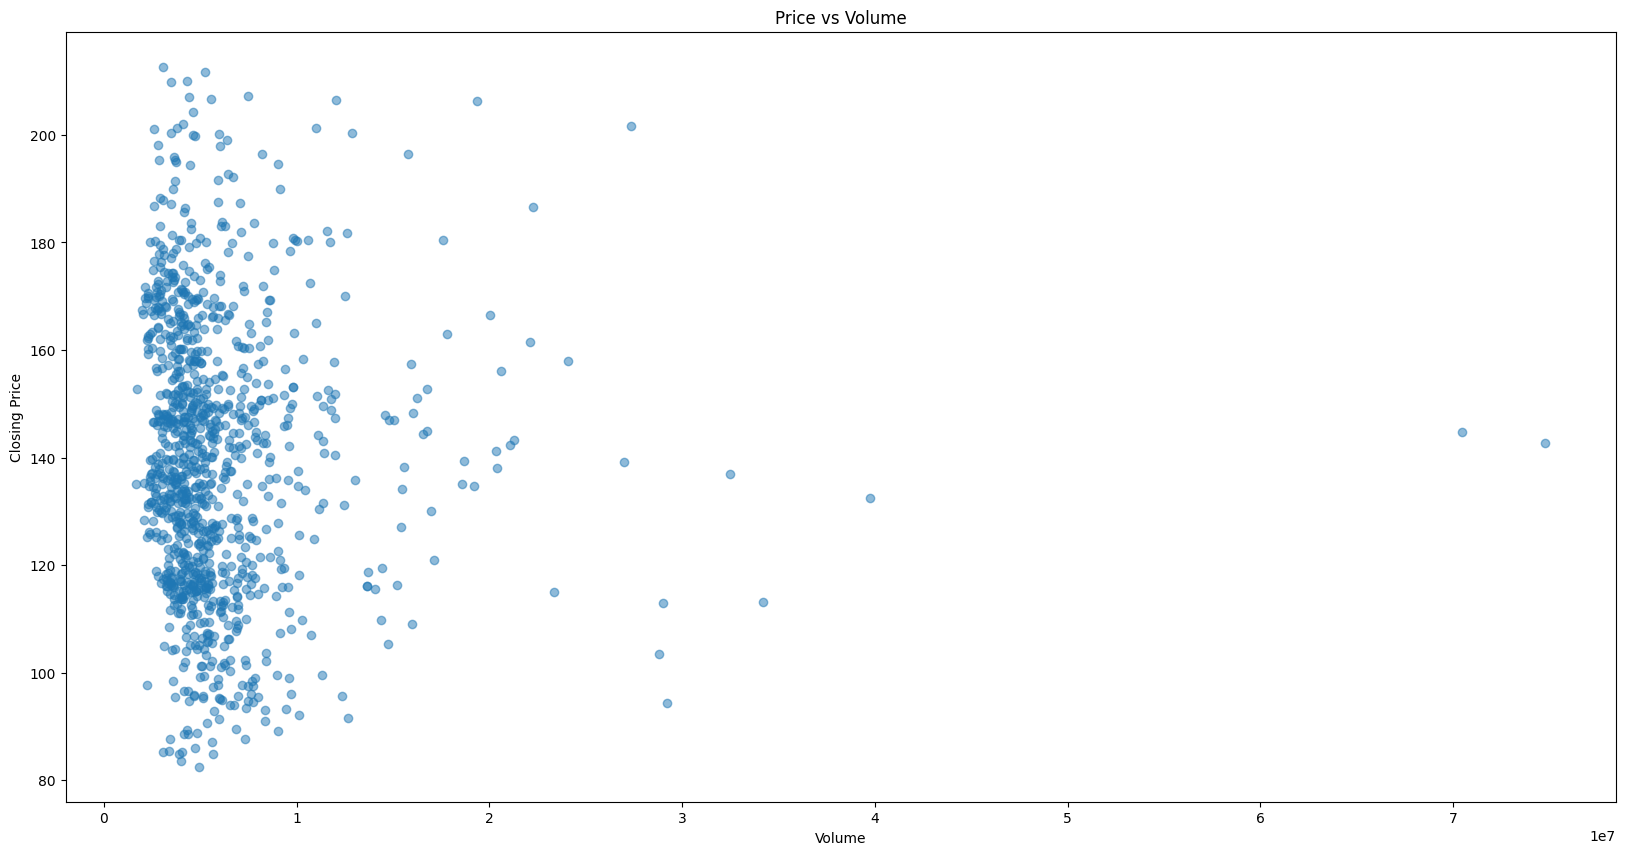

In [ ]:
# Volume Comparision
plt.figure(figsize=(20,10))
plt.scatter(ABNB_df_lr['Volume'], ABNB_df_lr['Close'], alpha= 0.5)
plt.xlabel("Volume")
plt.ylabel("Closing Price")
plt.title("Price vs Volume")
#plt.plot(ABNB_df_sr['Close'],ABNB_df_sr['Volume'], color='blue', label='Airbnb') # Added color='blue'
#plt.plot(BKNG_df_sr['Close'],BKNG_df_sr['Volume'], color='orange', label='Booking Holdongs')
#plt.plot(EXPE_df_sr['Close'],EXPE_df_sr['Volume'], color='green', label='Expedia')
#plt.plot(MAR_df_sr['Close'],MAR_df_sr['Volume'], color='red', label='Marriot International')


plt.show()
#plt.plot(MAR_df_sr['Close'],MAR_df_sr['Volume'], color='red', label='Marriot International')




### Time Series Analysis : to examine trends and patterns over time, focussing on the closing Prices

In [ ]:
## Time Series Analysis
pivot_data = combine_stock_df.pivot(index='Date', columns='Stock', values='Close')

#create s subplot
fig = make_subplots(rows=1, cols=1)

#Add traces for each stock
for column in pivot_data.columns:
    fig.add_trace(
        go.Scatter(x=pivot_data.index, y=pivot_data[column], name=column),
        row=1, col=1
    )
#update layout
fig.update_layout(
    title_text='Time series of closing Prices',
    xaxis_title = 'Date',
    yaxis_title = 'Closing Price',
    legend_title="Ticker",
    showlegend = True
)

# Show the plot
fig.show()

### - Volatility Analysis
We will calculate and compare the volatility (standard deviation) of the closing prices for each stock. It will give us an insight into how much the stock prices fluctuated over the period:

In [ ]:
# Volatility Analysis
volatility = pivot_data.std().sort_values(ascending=False)

fig = px.bar(volatility,
             x=volatility.index,
             y=volatility.values,
             labels={'y': 'Standard Deviation', 'x': 'Ticker'},
             title='Volatility of Closing Prices (Standard Deviation)')

# Show the figure
fig.show()

### Correlation Analysis
to understand how the stock prices of these companies are related to each other

In [ ]:
# Correlation Analysis
correlation_matrix = pivot_data.corr()

fig = go.Figure(data=go.Heatmap(
                    z=correlation_matrix,
                    x=correlation_matrix.columns,
                    y=correlation_matrix.columns,
                    colorscale='blues',
                    colorbar=dict(title='Correlation'),
                    ))

# Update layout
fig.update_layout(
    title='Correlation Matrix of Closing Prices',
    xaxis_title='Stock',
    yaxis_title='Stock'
)

# Show the figure
fig.show()

The heatmap above displays the correlation matrix of the closing prices of the four stocks (ABNB, BKNG, EXPE, MAR). Here’s what the correlation coefficients suggest:

- Values close to +1 indicate a strong positive correlation, meaning that as one stock’s price increases, the other tends to increase as well.
- Values close to -1 indicate a strong negative correlation, where one stock’s price increase corresponds to a decrease in the other.
- Values around 0 indicate a lack of correlation.

- From the heatmap, we can observe that there are varying degrees of positive correlations between the stock prices, with some pairs showing stronger correlations than others. For instance, BKNG and EXPE seem to have a relatively higher positive correlation (0.865).

#### Comparative Analysis
In this step, we’ll compare the performance of different stocks based on their returns over the period. We’ll calculate the percentage change in closing prices from the start to the end of the period for each stock:

In [ ]:
# Calculating the percentage change in closing prices
percentage_change = ((pivot_data.iloc[-1] - pivot_data.iloc[0]) / pivot_data.iloc[0]) * 100

fig = px.bar(percentage_change,
             x=percentage_change.index,
             y=percentage_change.values,
             labels={'y': 'Percentage Change (%)', 'x': 'Stock'},
             title='Percentage Change in Closing Prices')

# Show the plot
fig.show()

#### Daily Risk Vs. Return Analysis
- To perform a Risk vs. Return Analysis, we will calculate the average daily return and the standard deviation of daily returns for each stock. The standard deviation will serve as a proxy for risk, while the average daily return represents the expected return.

In [ ]:
daily_returns = pivot_data.pct_change().dropna()

# Recalculating average daily return and standard deviation (risk)
avg_daily_return = daily_returns.mean()
risk = daily_returns.std()

# Creating a DataFrame for plotting
risk_return_df = pd.DataFrame({'Risk': risk, 'Average Daily Return': avg_daily_return})

fig = go.Figure()

# Add scatter plot points
fig.add_trace(go.Scatter(
    x=risk_return_df['Risk'],
    y=risk_return_df['Average Daily Return'],
    mode='markers+text',
    text=risk_return_df.index,
    textposition="top center",
    marker=dict(size=10)
))

# Update layout
fig.update_layout(
    title='Risk vs. Return Analysis',
    xaxis_title='Risk (Standard Deviation)',
    yaxis_title='Average Daily Return',
    showlegend=False
)

# Show the plot
fig.show()

# Predictive Modeling

* Feature Engineering:
> Create new features (moving averages, price momentum, volatility indicators) to improve model performance.

### Feature Engineering

In [ ]:
# adding moving average as features for ABNB

ABNB_df_lr['MA_10'] = ABNB_df_lr['Close'].rolling(window=10).mean()
ABNB_df_lr['MA_50'] = ABNB_df_lr['Close'].rolling(window=50).mean()

# adding moving average as features for BKNG

BKNG_df_lr['MA_10'] = BKNG_df_lr['Close'].rolling(window=10).mean()
BKNG_df_lr['MA_50'] = BKNG_df_lr['Close'].rolling(window=50).mean()

# adding moving average as features for EXPE

EXPE_df_lr['MA_10'] = EXPE_df_lr['Close'].rolling(window=10).mean()
EXPE_df_lr['MA_50'] = EXPE_df_lr['Close'].rolling(window=50).mean()

# adding moving average as features for MAR

MAR_df_lr['MA_10'] = MAR_df_lr['Close'].rolling(window=10).mean()
MAR_df_lr['MA_50'] = MAR_df_lr['Close'].rolling(window=50).mean()

print(MAR_df_lr.head(3))
MAR_df_lr.tail(3)


        Date      Close       High        Low       Open  Volume Stock  MA_10  \
0 1998-03-23  13.152130  13.152130  13.152130  13.152130    1073   MAR    NaN   
1 1998-03-24  13.654468  13.654468  13.334798  13.334798  116711   MAR    NaN   
2 1998-03-25  13.859971  13.859971  13.700136  13.837138   27891   MAR    NaN   

   MA_50  
0    NaN  
1    NaN  
2    NaN  


,Date,Close,High,Low,Open,Volume,Stock,MA_10,MA_50
6759,2025-02-03,57.809226,290.970001,283.089996,286.790009,1218000,MAR,57.809226,57.809226
6760,2025-02-04,57.809226,291.859985,289.100006,291.480011,1401800,MAR,57.809226,57.809226
6761,2025-02-05,57.809226,293.140015,288.079987,291.059998,1329700,MAR,57.809226,57.809226


#### calculate relative Strength Index (RSI)

In [ ]:
# calculate RSI: MEASURES stock momentum for ABNB
delta = ABNB_df_lr['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()    # 14 is period
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss

ABNB_df_lr['RSI'] = 100 - (100/(1+rs))

# Drop NAN Values created by rolling caculations

ABNB_df_lr = ABNB_df_lr.dropna()

print(ABNB_df_lr.head(3))

         Date       Close        High    Low        Open    Volume Stock  \
49 2021-02-23  187.589996  191.669998  175.0  189.000000   5902400  ABNB   
50 2021-02-24  200.199997  208.145004  189.0  190.979996   5983500  ABNB   
51 2021-02-25  182.059998  199.800003  180.0  197.410004  11568500  ABNB   

         MA_10      MA_50          RSI  
49  195.779746  170.18635  1300.743082  
50  195.811746  171.29615   798.222206  
51  192.851745  172.15235  -767.849325  


In [ ]:
print(ABNB_df_lr.head(3))
ABNB_df_lr.tail(3)

         Date       Close        High    Low        Open    Volume Stock  \
49 2021-02-23  187.589996  191.669998  175.0  189.000000   5902400  ABNB   
50 2021-02-24  200.199997  208.145004  189.0  190.979996   5983500  ABNB   
51 2021-02-25  182.059998  199.800003  180.0  197.410004  11568500  ABNB   

         MA_10      MA_50          RSI  
49  195.779746  170.18635  1300.743082  
50  195.811746  171.29615   798.222206  
51  192.851745  172.15235  -767.849325  


,Date,Close,High,Low,Open,Volume,Stock,MA_10,MA_50,RSI
1040,2025-02-03,129.779999,130.955002,127.514999,129.190002,2745000,ABNB,131.123001,133.618701,1517.217136
1041,2025-02-04,130.740005,131.490005,129.080002,129.580002,2687200,ABNB,130.890001,133.604701,479.935709
1042,2025-02-05,129.600006,130.339996,128.100006,130.270004,3000700,ABNB,130.600002,133.491701,-347.603271


In [ ]:
# calculate RSI: MEASURES stock momentum for BKNG_df_lr
delta = BKNG_df_lr['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss

BKNG_df_lr['RSI'] = 100 - (100/(1+rs))

# Drop NAN Values created by rolling caculations

BKNG_df_lr = BKNG_df_lr.dropna()

print(BKNG_df_lr.head(3))

         Date       Close        High         Low        Open  Volume Stock  \
49 1999-06-10  608.108215  619.259344  594.726861  598.815608  290533  BKNG   
50 1999-06-11  569.079285  631.897312  564.990537  618.515957  268367  BKNG   
51 1999-06-14  457.196289  559.043267  454.966063  559.043267  534317  BKNG   

         MA_10       MA_50         RSI  
49  596.288019  635.670093 -113.424020  
50  587.292767  637.194081  -73.699363  
51  566.384406  636.762904  -65.763974  


In [ ]:
# calculate RSI: MEASURES stock momentum for EXPE_df_lr
delta = EXPE_df_lr['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss

EXPE_df_lr['RSI'] = 100 - (100/(1+rs))

# Drop NAN Values created by rolling caculations

EXPE_df_sr = EXPE_df_lr.dropna()

print(EXPE_df_lr.head(3))

        Date      Close       High        Low       Open  Volume Stock  MA_10  \
0 2005-07-21  31.640829  32.404846  31.509102  31.759384  109200  EXPE    NaN   
1 2005-07-22  32.747337  32.800027  31.548622  32.431193   56800  EXPE    NaN   
2 2005-07-25  31.930630  32.800028  31.812075  32.800028   39600  EXPE    NaN   

   MA_50  RSI  
0    NaN  NaN  
1    NaN  NaN  
2    NaN  NaN  


In [ ]:
# calculate RSI: MEASURES stock momentum for MAR_df_lr
delta = MAR_df_lr['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss

MAR_df_lr['RSI'] = 100 - (100/(1+rs))

# Drop NAN Values created by rolling caculations

MAR_df_lr = MAR_df_lr.dropna()
MAR_df_lr.head(3)

,Date,Close,High,Low,Open,Volume,Stock,MA_10,MA_50,RSI
49,1998-06-02,12.505084,12.802280,12.436501,12.756557,502030,MAR,12.562241,12.539421,169.492563
50,1998-06-03,12.505084,12.619391,12.390779,12.390779,761627,MAR,12.589674,12.526480,305.004714
51,1998-06-04,12.779424,12.779424,12.276476,12.367922,895501,MAR,12.573671,12.508979,208.572236


#### Save the Cleaned Data

In [ ]:
# Export the clened dataseta for further analysis

from google.colab import drive
import pickle
drive.mount('/content/drive')
# Export the cleaned dataset for further analysis

#data_cleaned.to_csv("cleaned_stock_prices.csv", index=False)
#ABNB_df_sr.to_csv("ABNB_df_sr.csv", index=False)
ABNB_df_lr.to_csv('/content/drive/MyDrive/ABNB_df_lr.csv', index=False)
BKNG_df_lr.to_csv('/content/drive/MyDrive/BKNG_df_lr.csv', index=False)
EXPE_df_lr.to_csv('/content/drive/MyDrive/EXPE_df_lr.csv', index=False)
MAR_df_lr.to_csv('/content/drive/MyDrive/MAR_df_lr.csv', index=False)


#Or

ABNB_df_lr.to_pickle('/content/drive/MyDrive/ABNB_df_lr.pkl')
BKNG_df_lr.to_pickle('/content/drive/MyDrive/BKNG_df_lr.pkl')
EXPE_df_lr.to_pickle('/content/drive/MyDrive/EXPE_df_lr.pkl')
MAR_df_lr.to_pickle('/content/drive/MyDrive/MAR_df_lr.pkl')

Mounted at /content/drive


### Model Selection:
> ■ Experiment with different time series forecasting models:
>> *  ■ ARIMA: Autoregressive Integrated Moving Average
>> * ■ LSTM: Long Short-Term Memory (for deep learning)
>> * ■ Prophet: Facebook's time series forecasting library

# LSTM: Long Short-Term Memory (for deep learning)

## Building LSTM for ABNB

In [ ]:
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# use only 'Close' prices
#close_prices = ABNB_df_lr['Close'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
#scaled_data = scaler.fit_transform(close_prices)

In [ ]:
# Replace infinite values with NaN
ABNB_df_lr.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN with the mean of the column

for column in ['Close', 'MA_10', 'MA_50', 'RSI', 'Volume']:
    ABNB_df_lr[column].fillna(ABNB_df_lr[column].mean(), inplace=True)

# Nomalize addtional features
scaled_data = scaler.fit_transform(ABNB_df_lr[['Close', 'MA_10', 'MA_50','RSI','Volume']])
scaled_df = pd.DataFrame(scaled_data, columns=['Close', 'MA_10', 'MA_50','RSI','Volume'])

<ipython-input-67-df711c35113d>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
print(scaled_df.head())
print(scaled_df.shape)
print(scaled_df.isnull().sum())

      Close     MA_10     MA_50       RSI    Volume
0  0.824314  0.959315  0.787817  0.337089  0.057794
1  0.923216  0.959593  0.799302  0.335446  0.058904
2  0.780941  0.933906  0.808162  0.330327  0.135296
3  0.971451  0.991730  0.823963  0.336680  0.241987
4  0.893569  0.977619  0.838786  0.322675  0.193155
(994, 5)
Close     0
MA_10     0
MA_50     0
RSI       0
Volume    0
dtype: int64


In [ ]:
#features and target
features = ['Close', 'MA_10', 'MA_50','RSI','Volume']
target = 'Close'

In [ ]:
# Prepare data for LSTM with additonal features
scaled_data = scaler.fit_transform(ABNB_df_lr[features])

In [ ]:
# Create Sequences

def create_sequences(data, n_steps):
    X,y = [],[]
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

def create_sequences_with_features(data, n_steps):     # for multiple features
    X,y = [],[]
    for i in range(len(data) - n_steps ):
        X.append(data[i:i+n_steps].values) # All features except
        y.append(data.iloc[i+n_steps,0]) # Close as a target
    # return np.array(X), np.array(y)
    X = np.array(X)
    y = np.array(y)
    return torch.tensor(X,dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

In [ ]:
 # Convert to Pytorch tensors
"""
#X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
"""

'\n#X_train = torch.tensor(X_train, dtype=torch.float32)\nX_test = torch.tensor(X_test, dtype=torch.float32)\ny_train = torch.tensor(y_train, dtype=torch.float32)\ny_test = torch.tensor(y_test, dtype=torch.float32)\n'

In [ ]:
n_steps = 60   # Use the past 60 days to predict the next day's price
X,y = create_sequences_with_features(scaled_df, n_steps)

# Split into training and testing sets

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
y_train.shape


torch.Size([187, 60, 5])
torch.Size([747, 60, 5])
torch.Size([187])


torch.Size([747])

In [ ]:
# reshaping y_train and y_test
y_train = y_train.view(-1, 1)
y_test = y_test.view(-1, 1)
print(y_test.shape)
y_train.shape

torch.Size([187, 1])


torch.Size([747, 1])

In [ ]:
class LSTM_model(nn.Module):
    def __init__(self, input_size = 1, hidden_size =50, num_layers = 1, output_size = 1, dropout=0.2):
        super(LSTM_model, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, 1) # fully connected layer

    def forward(self, x):
      # Initialize hidden and cell states
      h0 = torch.zeros(self.num_layers, x.shape[0], self.hidden_size).to(x.device)
      c0 = torch.zeros(self.num_layers, x.shape[0], self.hidden_size).to(x.device)
      out, _ = self.lstm(x, (h0, c0))

      # Fully connected layer on the last time step's output
      out = self.fc(out[:, -1, :])

      return out




In [ ]:
# Initialize the Model, Loss, and optimizer

# set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#initialize the model
model = LSTM_model(input_size = 5, hidden_size = 64, num_layers = 2, output_size = 1).to(device)

#define loss and optimizer
#criterion = nn.HuberLoss()         # or
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Train the model

# move the data to the same device as the model
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()    # set the model to training mode
    outputs = model(X_train)

    loss = criterion(outputs, y_train)

    optimizer.zero_grad()    # Clear graients
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/50], Loss: 0.0371
Epoch [20/50], Loss: 0.0244
Epoch [30/50], Loss: 0.0204
Epoch [40/50], Loss: 0.0122
Epoch [50/50], Loss: 0.0087


In [ ]:
print(y_test.shape)



torch.Size([187, 1])


In [ ]:
# Evaluate the model

model.eval() # set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print(f"Test Loss: {test_loss.item():.4f}")

   # predicted = model(X_test)
    predicted = test_outputs.cpu().numpy()
    y_test_actual = y_test.cpu().numpy().reshape(-1,1)

    #  Inverse transform to get real values
    ##y_test_actual = scaler.inverse_transform(y_test_actual)[:, 0]
   # predicted = scaler.inverse_transform(predicted.reshape(-1, 1))[:, 0]


  # reverse  the scaling
    # Reshape predicted to have the same number of features as the original data
    predicted_reshaped = np.zeros((predicted.shape[0], scaled_df.shape[1]))  # Create an array with the correct shape
    predicted_reshaped[:, 0] = predicted[:, 0]  # Fill the first column with predicted values

    # Reshape y_test_actual to have the same number of features as the original data before scaling
    y_test_actual_reshaped = np.zeros((y_test_actual.shape[0], scaled_df.shape[1]))
    y_test_actual_reshaped[:, 0] = y_test_actual[:,0]  # Fill the first column with actual 'Close' values

    # Inverse transform
    y_test_actual = scaler.inverse_transform(y_test_actual_reshaped)[:, 0]  # Inverse transform and extract the 'Close' column
    predicted = scaler.inverse_transform(predicted_reshaped)[:,0]




Test Loss: 0.0037


In [ ]:
#Save the model's state_dict
torch.save(model.state_dict(), '/content/drive/MyDrive/lstm_model_abnb_lr.pth')

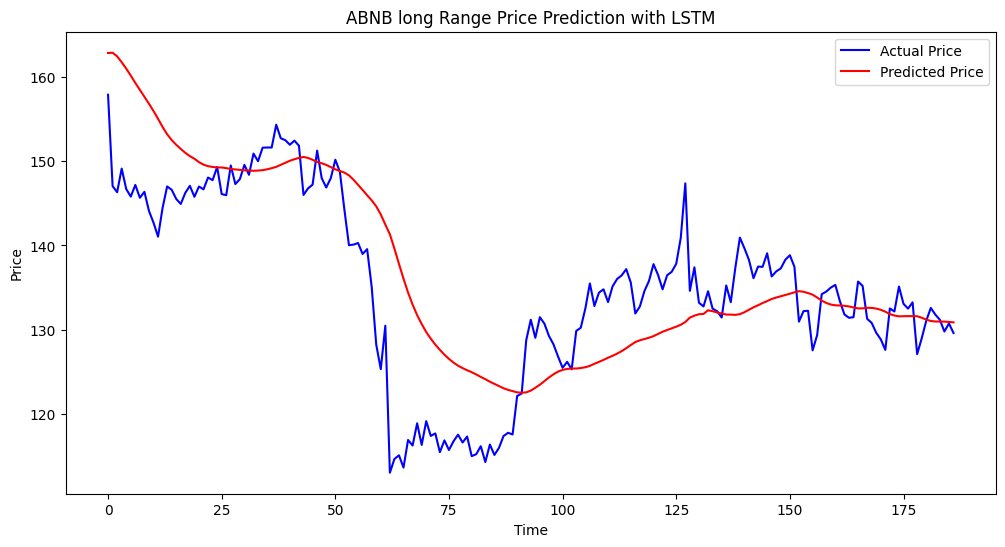

In [ ]:
# plot actual with predicted price

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Price', color='blue')
plt.plot(predicted, label='Predicted Price', color='red')

plt.title('ABNB long Range Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### Evaluate model performance using appropriate metrics (RMSE, MAE, MAPE) for ABNB

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# compute matrics

rmse = np.sqrt(mean_squared_error(y_test_actual, predicted))
mae = mean_absolute_error(y_test_actual, predicted)
mape = np.mean(np.abs((y_test_actual - predicted) / y_test_actual)) * 100    # MAPE in percentage

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 7.7608
MAE: 5.8524
MAPE: 4.48%


## Building LSTM for BKNG




In [ ]:
# Replace infinite values with NaN
BKNG_df_lr.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN with the mean of the column

for column in ['Close', 'MA_10', 'MA_50', 'RSI', 'Volume']:
    BKNG_df_lr[column].fillna(BKNG_df_lr[column].mean(), inplace=True)

# Nomalize addtional features
scaled_data = scaler.fit_transform(BKNG_df_lr[['Close', 'MA_10', 'MA_50','RSI','Volume']])
scaled_df_bkng = pd.DataFrame(scaled_data, columns=['Close', 'MA_10', 'MA_50','RSI','Volume'])

<ipython-input-84-a09bdbb56fad>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
print(scaled_df_bkng.head())
print(scaled_df_bkng.shape)
print(scaled_df_bkng.isnull().sum())

      Close     MA_10     MA_50       RSI    Volume
0  0.137848  0.135972  0.154972  0.567771  0.016048
1  0.128904  0.133895  0.155349  0.568119  0.014645
2  0.103266  0.129067  0.155242  0.568189  0.031479
3  0.105396  0.126183  0.155340  0.567619  0.032105
4  0.119109  0.125578  0.155618  0.567596  0.030707
(6402, 5)
Close     0
MA_10     0
MA_50     0
RSI       0
Volume    0
dtype: int64


In [ ]:
#features and target
features = ['Close', 'MA_10', 'MA_50','RSI','Volume']
target = 'Close'

In [ ]:
n_steps = 60   # Use the past 60 days to predict the next day's price
X,y = create_sequences_with_features(scaled_df_bkng, n_steps)

# Split into training and testing sets

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
y_train.shape


torch.Size([1269, 60, 5])
torch.Size([5073, 60, 5])
torch.Size([1269])


torch.Size([5073])

In [ ]:
# reshaping y_train and y_test
y_train = y_train.view(-1, 1)
y_test = y_test.view(-1, 1)
print(y_test.shape)
y_train.shape

torch.Size([1269, 1])


torch.Size([5073, 1])

In [ ]:
# Initialize the Model, Loss, and optimizer

# set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#initialize the model
model = LSTM_model(input_size = 5, hidden_size = 64, num_layers = 2, output_size = 1).to(device)

#define loss and optimizer
#criterion = nn.HuberLoss()         # or
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Train the model

# move the data to the same device as the model
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()    # set the model to training mode
    outputs = model(X_train)

    loss = criterion(outputs, y_train)

    optimizer.zero_grad()    # Clear graients
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 0.0226
Epoch [20/100], Loss: 0.0139
Epoch [30/100], Loss: 0.0006
Epoch [40/100], Loss: 0.0004
Epoch [50/100], Loss: 0.0005
Epoch [60/100], Loss: 0.0004
Epoch [70/100], Loss: 0.0003
Epoch [80/100], Loss: 0.0002
Epoch [90/100], Loss: 0.0002
Epoch [100/100], Loss: 0.0002


In [ ]:
print(y_test.shape)



torch.Size([1269, 1])


In [ ]:
# Evaluate the model BKNG

model.eval() # set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print(f"Test Loss: {test_loss.item():.4f}")

   # predicted = model(X_test)
    predicted_bkng = test_outputs.cpu().numpy()
    y_test_actual_bkng = y_test.cpu().numpy().reshape(-1,1)

    #  Inverse transform to get real values
    ##y_test_actual = scaler.inverse_transform(y_test_actual)[:, 0]
   # predicted = scaler.inverse_transform(predicted.reshape(-1, 1))[:, 0]


  # reverse  the scaling
    # Reshape predicted to have the same number of features as the original data
    predicted_reshaped = np.zeros((predicted_bkng.shape[0], scaled_df_bkng.shape[1]))  # Create an array with the correct shape
    predicted_reshaped[:, 0] = predicted_bkng[:, 0]  # Fill the first column with predicted values

    # Reshape y_test_actual to have the same number of features as the original data before scaling
    y_test_actual_reshaped = np.zeros((y_test_actual_bkng.shape[0], scaled_df_bkng.shape[1]))
    y_test_actual_reshaped[:, 0] = y_test_actual_bkng[:,0]  # Fill the first column with actual 'Close' values

    # Inverse transform
    y_test_actual_bkng = scaler.inverse_transform(y_test_actual_reshaped)[:, 0]  # Inverse transform and extract the 'Close' column
    predicted_bkng = scaler.inverse_transform(predicted_reshaped)[:,0]




Test Loss: 0.0066


In [ ]:
# Save the model's state_dict
torch.save(model.state_dict(), '/content/drive/MyDrive/lstm_model_bkng_lr.pth')

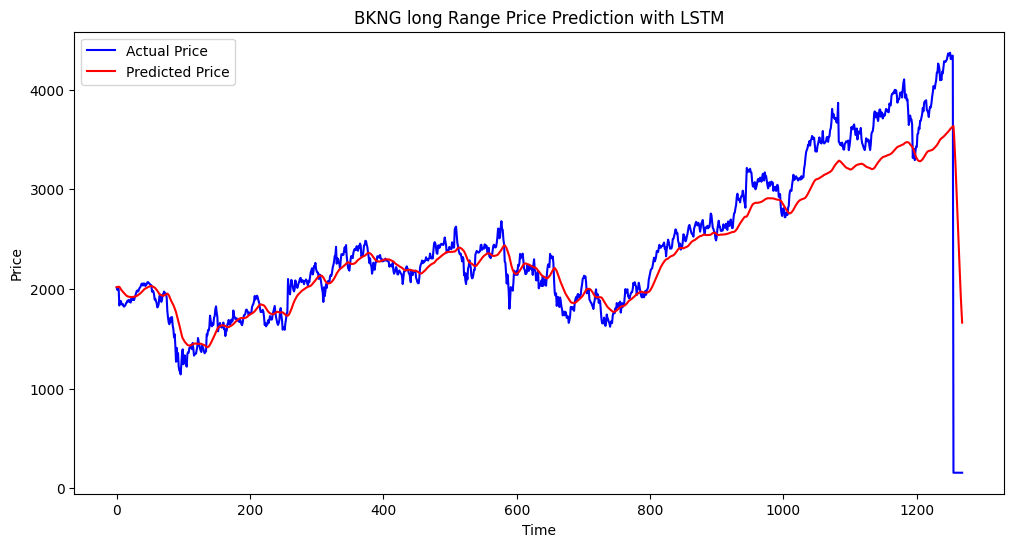

In [ ]:
# plot actual with predicted price

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual_bkng, label='Actual Price', color='blue')
plt.plot(predicted_bkng, label='Predicted Price', color='red')

plt.title('BKNG long Range Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### Evaluate model performance using appropriate metrics (RMSE, MAE, MAPE) for BKNG

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# compute matrics

rmse = np.sqrt(mean_squared_error(y_test_actual_bkng, predicted_bkng))
mae = mean_absolute_error(y_test_actual_bkng, predicted_bkng)
mape = np.mean(np.abs((y_test_actual_bkng - predicted_bkng) / y_test_actual_bkng)) * 100    # MAPE in percentage

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 355.3632
MAE: 191.3699
MAPE: 23.99%


## Building LSTM for EXPE

In [ ]:
# Replace infinite values with NaN
EXPE_df_lr.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN with the mean of the column

for column in ['Close', 'MA_10', 'MA_50', 'RSI', 'Volume']:
    EXPE_df_lr[column].fillna(EXPE_df_lr[column].mean(), inplace=True)

# Nomalize addtional features
scaled_data = scaler.fit_transform(EXPE_df_lr[['Close', 'MA_10', 'MA_50','RSI','Volume']])
scaled_df_expe = pd.DataFrame(scaled_data, columns=['Close', 'MA_10', 'MA_50','RSI','Volume'])

<ipython-input-97-ef390f316d98>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
print(scaled_df_expe.head())
print(scaled_df_expe.shape)
print(scaled_df_expe.isnull().sum())

      Close     MA_10    MA_50       RSI    Volume
0  0.115004  0.372969  0.39407  0.272654  0.002261
1  0.120380  0.372969  0.39407  0.272654  0.000559
2  0.116412  0.372969  0.39407  0.272654  0.000000
3  0.114876  0.372969  0.39407  0.272654  0.002042
4  0.115324  0.372969  0.39407  0.272654  0.001901
(4918, 5)
Close     0
MA_10     0
MA_50     0
RSI       0
Volume    0
dtype: int64


In [ ]:
#features and target
features = ['Close', 'MA_10', 'MA_50','RSI','Volume']
target = 'Close'

In [ ]:
n_steps = 60   # Use the past 60 days to predict the next day's price
X,y = create_sequences_with_features(scaled_df_expe, n_steps)

# Split into training and testing sets

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
y_train.shape


torch.Size([972, 60, 5])
torch.Size([3886, 60, 5])
torch.Size([972])


torch.Size([3886])

In [ ]:
# reshaping y_train and y_test
y_train = y_train.view(-1, 1)
y_test = y_test.view(-1, 1)
print(y_test.shape)
y_train.shape

torch.Size([972, 1])


torch.Size([3886, 1])

In [ ]:
# Initialize the Model, Loss, and optimizer

# set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#initialize the model
model = LSTM_model(input_size = 5, hidden_size = 64, num_layers = 2, output_size = 1).to(device)

#define loss and optimizer
#criterion = nn.HuberLoss()         # or
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Train the model

# move the data to the same device as the model
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()    # set the model to training mode
    outputs = model(X_train)

    loss = criterion(outputs, y_train)

    optimizer.zero_grad()    # Clear graients
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 0.0717
Epoch [20/100], Loss: 0.0319
Epoch [30/100], Loss: 0.0221
Epoch [40/100], Loss: 0.0097
Epoch [50/100], Loss: 0.0026
Epoch [60/100], Loss: 0.0020
Epoch [70/100], Loss: 0.0013
Epoch [80/100], Loss: 0.0012
Epoch [90/100], Loss: 0.0011
Epoch [100/100], Loss: 0.0010


In [ ]:
print(y_test.shape)



torch.Size([972, 1])


In [ ]:
# Evaluate the model

model.eval() # set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print(f"Test Loss: {test_loss.item():.4f}")

   # predicted = model(X_test)
    predicted_expe = test_outputs.cpu().numpy()
    y_test_actual_expe = y_test.cpu().numpy().reshape(-1,1)

    #  Inverse transform to get real values
    ##y_test_actual = scaler.inverse_transform(y_test_actual)[:, 0]
   # predicted = scaler.inverse_transform(predicted.reshape(-1, 1))[:, 0]


  # reverse  the scaling
    # Reshape predicted to have the same number of features as the original data
    predicted_reshaped = np.zeros((predicted_expe.shape[0], scaled_df_expe.shape[1]))  # Create an array with the correct shape
    predicted_reshaped[:, 0] = predicted_expe[:, 0]  # Fill the first column with predicted values

    # Reshape y_test_actual to have the same number of features as the original data before scaling
    y_test_actual_reshaped = np.zeros((y_test_actual_expe.shape[0], scaled_df_expe.shape[1]))
    y_test_actual_reshaped[:, 0] = y_test_actual_expe[:,0]  # Fill the first column with actual 'Close' values

    # Inverse transform
    y_test_actual_expe = scaler.inverse_transform(y_test_actual_reshaped)[:, 0]  # Inverse transform and extract the 'Close' column
    predicted_expe = scaler.inverse_transform(predicted_reshaped)[:,0]




Test Loss: 0.0031


In [ ]:
# Save the model's state_dict
torch.save(model.state_dict(), '/content/drive/MyDrive/lstm_model_expe_lr.pth')

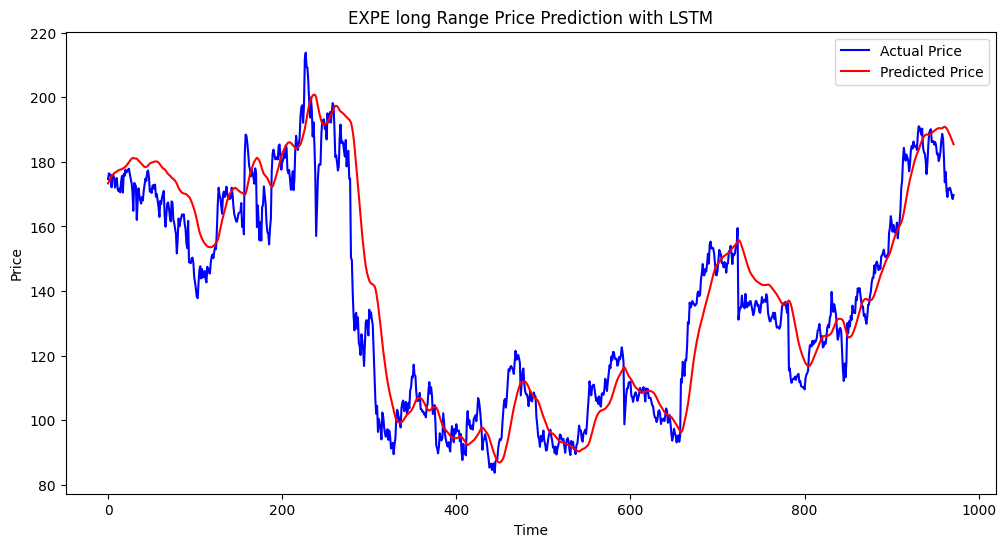

In [ ]:
# plot actual with predicted price

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual_expe, label='Actual Price', color='blue')
plt.plot(predicted_expe, label='Predicted Price', color='red')

plt.title('EXPE long Range Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

#### Evaluate model performance using appropriate metrics (RMSE, MAE, MAPE) for EXPE


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# compute matrics

rmse = np.sqrt(mean_squared_error(y_test_actual_expe, predicted_expe))
mae = mean_absolute_error(y_test_actual_expe, predicted_expe)
mape = np.mean(np.abs((y_test_actual_expe - predicted_expe) / y_test_actual_expe)) * 100    # MAPE in percentage

print(f"RMSE EXPE: {rmse:.4f}")
print(f"MAE EXPE: {mae:.4f}")
print(f"MAPE EXPE: {mape:.2f}%")

RMSE EXPE: 11.4587
MAE EXPE: 8.3090
MAPE EXPE: 6.32%


## Building LSTM for MAR



In [ ]:
# Replace infinite values with NaN
MAR_df_lr.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN with the mean of the column

for column in ['Close', 'MA_10', 'MA_50', 'RSI', 'Volume']:
    MAR_df_lr[column].fillna(MAR_df_lr[column].mean(), inplace=True)

# Nomalize addtional features
scaled_data = scaler.fit_transform(MAR_df_lr[['Close', 'MA_10', 'MA_50','RSI','Volume']])
scaled_df_mar = pd.DataFrame(scaled_data, columns=['Close', 'MA_10', 'MA_50','RSI','Volume'])

<ipython-input-110-e9ae77771ae0>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
print(scaled_df_expe.head())
print(scaled_df_expe.shape)
print(scaled_df_expe.isnull().sum())

      Close     MA_10    MA_50       RSI    Volume
0  0.115004  0.372969  0.39407  0.272654  0.002261
1  0.120380  0.372969  0.39407  0.272654  0.000559
2  0.116412  0.372969  0.39407  0.272654  0.000000
3  0.114876  0.372969  0.39407  0.272654  0.002042
4  0.115324  0.372969  0.39407  0.272654  0.001901
(4918, 5)
Close     0
MA_10     0
MA_50     0
RSI       0
Volume    0
dtype: int64


In [ ]:
#features and target
features = ['Close', 'MA_10', 'MA_50','RSI','Volume']
target = 'Close'

In [ ]:
n_steps = 60   # Use the past 60 days to predict the next day's price
X,y = create_sequences_with_features(scaled_df_mar, n_steps)

# Split into training and testing sets

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
y_train.shape


torch.Size([1293, 60, 5])
torch.Size([5172, 60, 5])
torch.Size([1293])


torch.Size([5172])

In [ ]:
# reshaping y_train and y_test
y_train = y_train.view(-1, 1)
y_test = y_test.view(-1, 1)
print(y_test.shape)
y_train.shape

torch.Size([1293, 1])


torch.Size([5172, 1])

In [ ]:
# Initialize the Model, Loss, and optimizer

# set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#initialize the model
model = LSTM_model(input_size = 5, hidden_size = 64, num_layers = 2, output_size = 1).to(device)

#define loss and optimizer
#criterion = nn.HuberLoss()         # or
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Train the model

# move the data to the same device as the model
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()    # set the model to training mode
    outputs = model(X_train)

    loss = criterion(outputs, y_train)

    optimizer.zero_grad()    # Clear graients
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 0.0197
Epoch [20/100], Loss: 0.0153
Epoch [30/100], Loss: 0.0109
Epoch [40/100], Loss: 0.0025
Epoch [50/100], Loss: 0.0017
Epoch [60/100], Loss: 0.0008
Epoch [70/100], Loss: 0.0004
Epoch [80/100], Loss: 0.0003
Epoch [90/100], Loss: 0.0003
Epoch [100/100], Loss: 0.0002


In [ ]:
print(y_test.shape)



torch.Size([1293, 1])


In [ ]:
# Evaluate the model

model.eval() # set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print(f"Test Loss: {test_loss.item():.4f}")

   # predicted = model(X_test)
    predicted_mar = test_outputs.cpu().numpy()
    y_test_actual_mar = y_test.cpu().numpy().reshape(-1,1)

    #  Inverse transform to get real values
    ##y_test_actual = scaler.inverse_transform(y_test_actual)[:, 0]
   # predicted = scaler.inverse_transform(predicted.reshape(-1, 1))[:, 0]


  # reverse  the scaling
    # Reshape predicted to have the same number of features as the original data
    predicted_reshaped = np.zeros((predicted_mar.shape[0], scaled_df_mar.shape[1]))  # Create an array with the correct shape
    predicted_reshaped[:, 0] = predicted_mar[:, 0]  # Fill the first column with predicted values

    # Reshape y_test_actual to have the same number of features as the original data before scaling
    y_test_actual_reshaped = np.zeros((y_test_actual_mar.shape[0], scaled_df_mar.shape[1]))
    y_test_actual_reshaped[:, 0] = y_test_actual_mar[:,0]  # Fill the first column with actual 'Close' values

    # Inverse transform
    y_test_actual_mar = scaler.inverse_transform(y_test_actual_reshaped)[:, 0]  # Inverse transform and extract the 'Close' column
    predicted_mar = scaler.inverse_transform(predicted_reshaped)[:,0]




Test Loss: 0.0114


In [ ]:
 Save the model's state_dict
torch.save(model.state_dict(), '/content/drive/MyDrive/lstm_model_mar_lr.pth')

SyntaxError: unterminated string literal (detected at line 1) (<ipython-input-120-4479d22bbf21>, line 1)

In [ ]:
# plot actual with predicted price

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual_mar, label='Actual Price', color='blue')
plt.plot(predicted_mar, label='Predicted Price', color='red')

plt.title('MAR long Range Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### Evaluate model performance using appropriate metrics (RMSE, MAE, MAPE) for BKNG

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# compute matrics

rmse = np.sqrt(mean_squared_error(y_test_actual_expe, predicted_expe))
mae = mean_absolute_error(y_test_actual_expe, predicted_expe)
mape = np.mean(np.abs((y_test_actual_expe - predicted_expe) / y_test_actual_expe)) * 100    # MAPE in percentage

print(f"RMSE MAR: {rmse:.4f}")
print(f"MAE MAR: {mae:.4f}")
print(f"MAPE MAR: {mape:.2f}%")

# Using ARIMA (Autoregressive Integrated Moving Average)

In [ ]:
# import stasmodels.tsa.arima.model as ARIMA

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX  # Arima with multiple featurs
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

## Buliding ARIMA for ABNB

In [ ]:
df_arima_abnb = ABNB_df_lr.copy()
df_arima_abnb.head()
print(df_arima_abnb.shape)

In [ ]:
# Select the target variable ('Close') and features
target_variable = 'Close'
features = ['MA_10', 'MA_50', 'RSI', 'Volume']

# Keep only the relevant components
df_arima_abnb = df_arima_abnb[[target_variable] + features]
df_arima_abnb.head()



In [ ]:
# check for statinarity
def check_stationarity(timesries):
  result = adfuller(timesries)
  print(f'ADF Statistic: {result[0]:4f}')
  print('p-value: {result[1]:4f}')

  if result[1] <= 0.05:
    print('The series is stationary')
  else:
    print('The series is not stationary: Differencing is needed')

check_stationarity(df_arima_abnb[target_variable])

In [ ]:
# Differencing if Needed (Make the Data Stationary)
df_arima_abnb_diff = df_arima_abnb.diff().dropna()

check_stationarity(df_arima_abnb[target_variable])

In [ ]:
# check for statinarity
def check_stationarity(timesries):
  result = adfuller(timesries)
  labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
  for value, label in zip(result, labels):
    print(f'{label}: {value}')
  if result[1] <= 0.05:
    print('The series is stationary')
  else:
    print('The series is not stationary: Differencing is needed')

In [ ]:
check_stationarity(df_arima_abnb_diff[target_variable])

In [ ]:
plt.figure(figsize=(12,6))
#plt.plot(df_arima_abnb[target_variable], label='Original')
plt.plot(df_arima_abnb_diff[target_variable], label='Differenced')
plt.legend()
plt.show()

In [ ]:
# split Data into Training & Testing
train_size = int(len(df_arima_abnb)*0.8)
train, test = df_arima_abnb.iloc[:train_size], df_arima_abnb.iloc[train_size:]

# split target variable y, and features X
X_train1, y_train1 = train[features], train[target_variable]
X_test1, y_test1 = test[features], test[target_variable]

X_train = X_train1.to_numpy()
y_train = y_train1.to_numpy()
X_test = X_test1.to_numpy()
y_test = y_test1.to_numpy()

In [ ]:
# fit ARIMAX model
model = SARIMAX(y_train, exog=X_train, order=(1,1,1), seasonal_order=(0,0,0,0))
model_fit = model.fit()


In [ ]:
import pickle  # for saving the model

# Save the fited model
with open('/content/drive/MyDrive/arima_model_abnb_lr.pkl', 'wb') as file:
    pickle.dump(model_fit, file)

In [ ]:
# Make predictions
prediction_abnb = model_fit.forecast(steps=len(y_test), exog=X_test)

In [ ]:
# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, prediction_abnb))
mae = mean_absolute_error(y_test, prediction_abnb)
mape = np.mean(np.abs((y_test - prediction_abnb) / y_test)) * 100    # MAPE in percentage

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")

In [ ]:
# plot
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, label="Actual Prices", color="blue")
plt.plot(range(len(prediction_abnb)), prediction_abnb, label="Predicted Prices", color="red")
plt.legend()
plt.title("ABNB ARIMAX Stock Price Prediction")
plt.show()

In [ ]:
# Fine-tune model hyperparameters to optimize performance
# Extract the Best Hyperparameters from auto_arima

best_arima = auto_arima(y_train, exog=X_train, seasonal=False, stepwise=True, trace=True)

# print the best parameters
print(best_arima.summary())


In [ ]:
# Train the Final ARIMAX Model with the Best Hyperparameters

# Use the best p, d, q from auto_arima
best_p, best_d, best_q = best_arima.order   #(3,2,1)

# train the model
final_model = SARIMAX(y_train, exog=X_train, order=(best_p, best_d, best_q), seasonal_order=(0,0,0,0))
final_model_fit = final_model.fit()


In [ ]:
# Make prediction
final_prediction_abnb = final_model_fit.forecast(steps=len(y_test), exog=X_test)

# evaliate performance
rmse = np.sqrt(mean_squared_error(y_test, final_prediction_abnb))
mae = mean_absolute_error(y_test, prediction_abnb)
mape = np.mean(np.abs((y_test - final_prediction_abnb) / y_test)) * 100    # MAPE in percentage

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")


In [ ]:
# Visualize the results
# plot
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, label="Actual Prices", color="blue")
plt.plot(range(len(final_prediction_abnb)), final_prediction_abnb, label="Predicted Prices", color="red")
plt.legend()
plt.title("ABNB ARIMAX Stock Price Prediction")
plt.show()

## Buliding ARIMA for BKNG

In [ ]:
df_arima_bkng = BKNG_df_lr.copy()
df_arima_bkng.head()
print(df_arima_bkng.shape)

In [ ]:
# Select the target variable ('Close') and features
target_variable = 'Close'
features = ['MA_10', 'MA_50', 'RSI', 'Volume']

# Keep only the relevant components
df_arima_bkng = df_arima_bkng[[target_variable] + features]
df_arima_bkng.head()



In [ ]:
# check for statinarity
def check_stationarity(timesries):
  result = adfuller(timesries)
  print(f'ADF Statistic: {result[0]:4f}')
  print('p-value: {result[1]:4f}')

  if result[1] <= 0.05:
    print('The series is stationary')
  else:
    print('The series is not stationary: Differencing is needed')

check_stationarity(df_arima_bkng[target_variable])

In [ ]:
# Differencing if Needed (Make the Data Stationary)
df_arima_bkng_diff = df_arima_bkng.diff().dropna()

check_stationarity(df_arima_bkng_diff[target_variable])

In [ ]:
check_stationarity(df_arima_bkng_diff[target_variable])

In [ ]:
plt.figure(figsize=(12,6))
#plt.plot(df_arima_abnb[target_variable], label='Original')
plt.plot(df_arima_bkng_diff[target_variable], label='Differenced')
plt.legend()
plt.show()

In [ ]:
# split Data into Training & Testing
train_size = int(len(df_arima_bkng)*0.8)
train, test = df_arima_bkng.iloc[:train_size], df_arima_bkng.iloc[train_size:]

# split target variable y, and features X
X_train1, y_train1 = train[features], train[target_variable]
X_test1, y_test1 = test[features], test[target_variable]

X_train = X_train1.to_numpy()
y_train = y_train1.to_numpy()
X_test = X_test1.to_numpy()
y_test = y_test1.to_numpy()

In [ ]:
# fit ARIMAX model
model = SARIMAX(y_train, exog=X_train, order=(1,1,1), seasonal_order=(0,0,0,0))
model_fit = model.fit()


In [ ]:
#import pickle  # for saving the model

# Save the fited model
with open('/content/drive/MyDrive/arima_model_bkng_lr.pkl', 'wb') as file:
    pickle.dump(model_fit, file)

In [ ]:
# Make predictions
prediction_bkng = model_fit.forecast(steps=len(y_test), exog=X_test)

In [ ]:
# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, prediction_bkng))
mae = mean_absolute_error(y_test, prediction_bkng)
mape = np.mean(np.abs((y_test - prediction_bkng) / y_test)) * 100    # MAPE in percentage

print(f"RMSE of BKNG: {rmse:.4f}")
print(f"MAE of BKNG: {mae:.4f}")
print(f"MAPE of BKNG: {mape:.2f}%")

In [ ]:
# plot
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, label="Actual Prices", color="blue")
plt.plot(range(len(prediction_bkng)), prediction_bkng, label="Predicted Prices", color="red")
plt.legend()
plt.title("BKNG ARIMAX Stock Price Prediction")
plt.show()

In [ ]:
# Fine-tune model hyperparameters to optimize performance
# Extract the Best Hyperparameters from auto_arima

best_arima = auto_arima(y_train, exog=X_train, seasonal=False, stepwise=True, trace=True)

# print the best parameters
print(best_arima.summary())


In [ ]:
# Train the Final ARIMAX Model with the Best Hyperparameters

# Use the best p, d, q from auto_arima
best_p, best_d, best_q = best_arima.order   #(3,2,1)

# train the model
final_model = SARIMAX(y_train, exog=X_train, order=(best_p, best_d, best_q), seasonal_order=(0,0,0,0))
final_model_fit = final_model.fit()


In [ ]:
# Make prediction
final_prediction_bkng = final_model_fit.forecast(steps=len(y_test), exog=X_test)

# evaliate performance
rmse = np.sqrt(mean_squared_error(y_test, final_prediction_bkng))
mae = mean_absolute_error(y_test, prediction_bkng)
mape = np.mean(np.abs((y_test - final_prediction_bkng) / y_test)) * 100    # MAPE in percentage

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")


In [ ]:
# Visualize the results
# plot
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, label="Actual Prices", color="blue")
plt.plot(range(len(final_prediction_bkng)), final_prediction_bkng, label="Predicted Prices", color="red")
plt.legend()
plt.title("BEST BKNG ARIMAX Stock Price Prediction")
plt.show()

## Buliding ARIMA for EXPE

In [ ]:
df_arima_expe = EXPE_df_lr.copy()
df_arima_expe.head()
print(df_arima_expe.shape)

In [ ]:
# Select the target variable ('Close') and features
target_variable = 'Close'
features = ['MA_10', 'MA_50', 'RSI', 'Volume']

# Keep only the relevant components
df_arima_expe = df_arima_expe[[target_variable] + features]
df_arima_expe.head()



In [ ]:
# check for statinarity
def check_stationarity(timesries):
  result = adfuller(timesries)
  print(f'ADF Statistic: {result[0]:4f}')
  print('p-value: {result[1]:4f}')

  if result[1] <= 0.05:
    print('The series is stationary')
  else:
    print('The series is not stationary: Differencing is needed')

check_stationarity(df_arima_expe[target_variable])

In [ ]:
# Differencing if Needed (Make the Data Stationary)
df_arima_expe_diff = df_arima_expe.diff().dropna()

check_stationarity(df_arima_expe_diff[target_variable])

In [ ]:
plt.figure(figsize=(12,6))
#plt.plot(df_arima_abnb[target_variable], label='Original')
plt.plot(df_arima_expe_diff[target_variable], label='Differenced')
plt.legend()
plt.show()

In [ ]:
# split Data into Training & Testing
train_size = int(len(df_arima_expe)*0.8)
train, test = df_arima_expe.iloc[:train_size], df_arima_expe.iloc[train_size:]

# split target variable y, and features X
X_train1, y_train1 = train[features], train[target_variable]
X_test1, y_test1 = test[features], test[target_variable]

X_train = X_train1.to_numpy()
y_train = y_train1.to_numpy()
X_test = X_test1.to_numpy()
y_test = y_test1.to_numpy()

In [ ]:
# fit ARIMAX model
model = SARIMAX(y_train, exog=X_train, order=(1,1,1), seasonal_order=(0,0,0,0))
model_fit = model.fit()


In [ ]:
#import pickle  # for saving the model

# Save the fited model
with open('/content/drive/MyDrive/arima_model_expe_lr.pkl', 'wb') as file:
    pickle.dump(model_fit, file)

In [ ]:
# Make predictions
prediction_expe = model_fit.forecast(steps=len(y_test), exog=X_test)

In [ ]:
# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, prediction_expe))
mae = mean_absolute_error(y_test, prediction_expe)
mape = np.mean(np.abs((y_test - prediction_expe) / y_test)) * 100    # MAPE in percentage

print(f"RMSE of EXPE: {rmse:.4f}")
print(f"MAE of EXPE: {mae:.4f}")
print(f"MAPE of EXPE: {mape:.2f}%")

In [ ]:
# plot
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, label="Actual Prices", color="blue")
plt.plot(range(len(prediction_expe)), prediction_expe, label="Predicted Prices", color="red")
plt.legend()
plt.title("EXPE ARIMAX Stock Price Prediction")
plt.show()

In [ ]:
# Fine-tune model hyperparameters to optimize performance
# Extract the Best Hyperparameters from auto_arima

best_arima = auto_arima(y_train, exog=X_train, seasonal=False, stepwise=True, trace=True)

# print the best parameters
print(best_arima.summary())


In [ ]:
# Train the Final ARIMAX Model with the Best Hyperparameters

# Use the best p, d, q from auto_arima
best_p, best_d, best_q = best_arima.order   #(3,2,1)

# train the model
final_model = SARIMAX(y_train, exog=X_train, order=(best_p, best_d, best_q), seasonal_order=(0,0,0,0))
final_model_fit = final_model.fit()


In [ ]:
# Make prediction
final_prediction_expe = final_model_fit.forecast(steps=len(y_test), exog=X_test)

# evaliate performance
rmse = np.sqrt(mean_squared_error(y_test, final_prediction_expe))
mae = mean_absolute_error(y_test, prediction_expe)
mape = np.mean(np.abs((y_test - final_prediction_expe) / y_test)) * 100    # MAPE in percentage

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")


In [ ]:
# Visualize the results
# plot
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, label="Actual Prices", color="blue")
plt.plot(range(len(final_prediction_expe)), final_prediction_expe, label="Predicted Prices", color="red")
plt.legend()
plt.title("Best EXPE ARIMAX Stock Price Prediction")
plt.show()

## Buliding ARIMA for MAR

In [ ]:
df_arima_mar = MAR_df_lr.copy()
df_arima_mar.head()
print(df_arima_mar.shape)

In [ ]:
# Select the target variable ('Close') and features
target_variable = 'Close'
features = ['MA_10', 'MA_50', 'RSI', 'Volume']

# Keep only the relevant components
df_arima_mar = df_arima_mar[[target_variable] + features]
df_arima_mar.head()



In [ ]:
# check for statinarity
def check_stationarity(timesries):
  result = adfuller(timesries)
  print(f'ADF Statistic: {result[0]:4f}')
  print('p-value: {result[1]:4f}')

  if result[1] <= 0.05:
    print('The series is stationary')
  else:
    print('The series is not stationary: Differencing is needed')

check_stationarity(df_arima_mar[target_variable])

In [ ]:
# Differencing if Needed (Make the Data Stationary)
df_arima_mar_diff = df_arima_mar.diff().dropna()

check_stationarity(df_arima_mar_diff[target_variable])

In [ ]:
plt.figure(figsize=(12,6))
#plt.plot(df_arima_abnb[target_variable], label='Original')
plt.plot(df_arima_mar_diff[target_variable], label='Differenced')
plt.legend()
plt.show()

In [ ]:
# split Data into Training & Testing
train_size = int(len(df_arima_mar)*0.8)
train, test = df_arima_mar.iloc[:train_size], df_arima_mar.iloc[train_size:]

# split target variable y, and features X
X_train1, y_train1 = train[features], train[target_variable]
X_test1, y_test1 = test[features], test[target_variable]

X_train = X_train1.to_numpy()
y_train = y_train1.to_numpy()
X_test = X_test1.to_numpy()
y_test = y_test1.to_numpy()

In [ ]:
# fit ARIMAX model
model = SARIMAX(y_train, exog=X_train, order=(1,1,1), seasonal_order=(0,0,0,0))
model_fit = model.fit()


In [ ]:
#import pickle  # for saving the model

# Save the fited model
with open('/content/drive/MyDrive/arima_model_mar_lr.pkl', 'wb') as file:
    pickle.dump(model_fit, file)

In [ ]:
# Make predictions
prediction_mar = model_fit.forecast(steps=len(y_test), exog=X_test)

In [ ]:
# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, prediction_mar))
mae = mean_absolute_error(y_test, prediction_mar)
mape = np.mean(np.abs((y_test - prediction_mar) / y_test)) * 100    # MAPE in percentage

print(f"RMSE of MAR: {rmse:.4f}")
print(f"MAE of MAR: {mae:.4f}")
print(f"MAPE of MAR: {mape:.2f}%")

In [ ]:
# plot
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, label="Actual Prices", color="blue")
plt.plot(range(len(prediction_mar)), prediction_mar, label="Predicted Prices", color="red")
plt.legend()
plt.title("MAR ARIMAX Stock Price Prediction")
plt.show()

In [ ]:
# Fine-tune model hyperparameters to optimize performance
# Extract the Best Hyperparameters from auto_arima

best_arima = auto_arima(y_train, exog=X_train, seasonal=False, stepwise=True, trace=True)

# print the best parameters
print(best_arima.summary())


In [ ]:
# Train the Final ARIMAX Model with the Best Hyperparameters

# Use the best p, d, q from auto_arima
best_p, best_d, best_q = best_arima.order   #(3,2,1)

# train the model
final_model = SARIMAX(y_train, exog=X_train, order=(best_p, best_d, best_q), seasonal_order=(0,0,0,0))
final_model_fit = final_model.fit()


In [ ]:
# Make prediction
final_prediction_mar = final_model_fit.forecast(steps=len(y_test), exog=X_test)

# evaliate performance
rmse = np.sqrt(mean_squared_error(y_test, final_prediction_mar))
mae = mean_absolute_error(y_test, prediction_mar)
mape = np.mean(np.abs((y_test - final_prediction_mar) / y_test)) * 100    # MAPE in percentage

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")


In [ ]:
# Visualize the results
# plot
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, label="Actual Prices", color="blue")
plt.plot(range(len(final_prediction_mar)), final_prediction_mar, label="Predicted Prices", color="red")
plt.legend()
plt.title("Best MAR ARIMAX Stock Price Prediction")
plt.show()

## Model Tuning:
    Fine-tune model hyperparameters to optimize performance

# Using Prophet: Facebook's time series forecasting library

**Prophet** is a great alternative to ARIMA for forecasting stock prices when you have multiple features

In [ ]:
from prophet import Prophet
from fbprophet import Prophet

In [ ]:
# Load Dataset
df_prophet_abnb = ABNB_df_lr.copy()
print(df_prophet_abnb.head())
print(df_prophet_abnb.shape)

In [ ]:
# Select features
features = ['MA_10', 'MA_50', 'RSI', 'Volume']
target_col = 'Close'

# Rename the target variable to 'y' and date column to 'ds' ((Prophet's required format))
df_prophet_abnb.rename(columns={"Date":"ds", target_col:"y"}, inplace=True)
df_prophet_abnb.head()

# Add additional features
df_prophet_abnb = df_prophet_abnb[['ds','y'] + features]
df_prophet_abnb.head()


In [ ]:
# Before fitting the model, remove the timezone from the 'ds' column:
df_prophet_abnb['ds'] = df_prophet_abnb['ds'].dt.tz_localize(None)

In [ ]:
# Split the data into Training and Testing
train_size = int(len(df_prophet_abnb)*0.8)
train, test = df_prophet_abnb.iloc[:train_size], df_prophet_abnb.iloc[train_size:]

# initialize and tarin the model
model = Prophet()
for feature in features:
  model.add_regressor(feature) # add each feature variable
model.fit(train)  #ValueError: Column ds has timezone specified, which is not supported. Remove timezone.


In [ ]:
# Make Future Prediction
# Set periods to 0 and frequency to match your data
predict_feature = model.make_future_dataframe(periods=len(test), freq='2min')

# Ensure 'ds' columns have the same type and format before filtering
predict_feature['ds'] = pd.to_datetime(predict_feature['ds']).dt.tz_localize(None)
#test['ds'] = pd.to_datetime(test['ds']).dt.tz_localize(None)


predict_feature = predict_feature[predict_feature['ds'].isin(test.index)] # Filter to include only dates present in test data

predict_feature = pd.merge(predict_feature, df_prophet_abnb[['ds'] + features], on='ds', how='left')

# Fill any remaining NaN values with backfill or other methods as appropriate:

predict_feature.fillna(method='ffill', inplace=True)
predict_feature.fillna(method='bfill', inplace=True)

#for feature in features:
 # predict_feature[feature] = df_prophet_abnb[feature]

forecast = model.predict(predict_feature)

# Instead of using test["ds"] directly, get the common dates between forecast and test
#common_dates = forecast['ds'].isin(test['ds'])
#test = test.set_index('ds')

# extract Predictions
prediction_prophet_abnb = forecast.set_index('ds').loc[test.index.to_list(),['yhat']]

In [ ]:
# Evaluate the model performance

rmse = np.sqrt(mean_squared_error(test['y'], prediction_prophet_abnb['yhat']))
mae = mean_absolute_error(test['y'], prediction_prophet_abnb['yhat'])
mape = np.mean(np.abs((test['y'] - prediction_prophet_abnb['yhat']) / test['y'])) * 100    # MAPE in percentage

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
